In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

from statsmodels.api import OLS
import statsmodels.api as sm

## Data Understanding

In [2]:
data = pd.read_csv("train.csv") # Mention the path to the directory; in my case the file is located in the same dir
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [6]:
# Let's check the amount of NAN values present in the data 
def get_nan_vals(dataframe):
    nan_vals = dataframe.isna().sum()
    nan_vals = nan_vals[nan_vals > 0].sort_values(ascending = False)
    
    for i,j in zip(nan_vals.index, nan_vals.values):
        print(f"{i} has {j} NA values which constitutes about {round((j/(dataframe.shape[0])), 3) * 100}% of {i}\n")
    
    

In [7]:
get_nan_vals(data)

PoolQC has 1453 NA values which constitutes about 99.5% of PoolQC

MiscFeature has 1406 NA values which constitutes about 96.3% of MiscFeature

Alley has 1369 NA values which constitutes about 93.8% of Alley

Fence has 1179 NA values which constitutes about 80.80000000000001% of Fence

FireplaceQu has 690 NA values which constitutes about 47.3% of FireplaceQu

LotFrontage has 259 NA values which constitutes about 17.7% of LotFrontage

GarageType has 81 NA values which constitutes about 5.5% of GarageType

GarageYrBlt has 81 NA values which constitutes about 5.5% of GarageYrBlt

GarageFinish has 81 NA values which constitutes about 5.5% of GarageFinish

GarageQual has 81 NA values which constitutes about 5.5% of GarageQual

GarageCond has 81 NA values which constitutes about 5.5% of GarageCond

BsmtExposure has 38 NA values which constitutes about 2.6% of BsmtExposure

BsmtFinType2 has 38 NA values which constitutes about 2.6% of BsmtFinType2

BsmtFinType1 has 37 NA values which constit

In [8]:
# As one might see that there are many NAN values but we need to be careful with this dataset as NA 
# also represents Not avalaible/Not provided in this dataset
# For this we have to look into our data dictionary, encode all the values as per the information and then check again
# the null/ Na values

In [9]:
# Alley - No Alley Access
# BsmtQual - No Basement
# BsmtCond - No Basement
# BsmtExposure - No Basement
# BsmtFinType1 - No Basement
# BsmtFinType2 - No Basement
# FireplaceQu - No Fireplace
# GarageType - No Garage
# GarageFinish - No Garage
# GarageQual - No Garage
# GarageCond - No Garage
# PoolQC - No Pool
# Fence - No Fence
# MiscFeature - None

# These columns do have NA values but in this case NA means something its not just that the value isnt present or
# missed its just that that particular section is not provided with the house according to the data dictionary
# We will impute these first and check again

In [10]:
impute_NA = ["Alley", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", 
             "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in impute_NA:
    print(f"Unique values for {i} are as follows: \n {data[i].unique()} \n")

Unique values for Alley are as follows: 
 [nan 'Grvl' 'Pave'] 

Unique values for BsmtQual are as follows: 
 ['Gd' 'TA' 'Ex' nan 'Fa'] 

Unique values for BsmtExposure are as follows: 
 ['No' 'Gd' 'Mn' 'Av' nan] 

Unique values for BsmtFinType1 are as follows: 
 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'] 

Unique values for BsmtFinType2 are as follows: 
 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ'] 

Unique values for FireplaceQu are as follows: 
 [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

Unique values for GarageType are as follows: 
 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 

Unique values for GarageFinish are as follows: 
 ['RFn' 'Unf' 'Fin' nan] 

Unique values for GarageQual are as follows: 
 ['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 

Unique values for GarageCond are as follows: 
 ['TA' 'Fa' nan 'Gd' 'Po' 'Ex'] 

Unique values for PoolQC are as follows: 
 [nan 'Ex' 'Fa' 'Gd'] 

Unique values for Fence are as follows: 
 [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 

Unique values for MiscFeat

### From the output it is clear that some of the columns have some order i.e ratings, maybe we can conver these into numeircs to better interpret 

### Also we can drop Alley, MiscFeatures, PoolQc and Fence cause they have  high nan values and even though we possess the encoding behind the nan values in these features; it willy heavily skew the data towards one value i.e NAN; For example in PoolQc around 99.5% of the values are NAN and according to the information provided to us NANc in this columns means that the pool isnt avalaible with the property which means that 99.5% of the values in this column will be Not Avalaible which doesnt seem to convey much information and will be utterly useless in our model since almost all the values will be identical

In [11]:
data.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis = 1, inplace = True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
# For FireplaceQc since one value will take up 47% of the data and we dont know for sure if there was a mistake
# while recording the values, we arent sure but we are sure of the fact that fireplace qc is an important variable
# So we will do the following

data["FireplaceQu"].fillna("No_fireplace", inplace = True)

In [13]:
# Custom mapping function to help us map various encodings
def mapping(dataframe, column, mappings):
    return dataframe[column].replace(mappings[0], mappings[1])

### Now we can go ahead and start mapping the nan values with some other names which can easily be identified

In [14]:
cols_for_bsmt = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

for i in cols_for_bsmt:
    data[i] = mapping(dataframe = data, column = i, mappings = [[np.nan], ["No_Basement"]])

In [15]:
data["FireplaceQu"] = mapping(dataframe = data, column = "FireplaceQu", mappings = [[np.nan], ["No_Fireplace"]])

In [16]:
cols_for_garage = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for j in cols_for_garage:
    data[j] = mapping(dataframe = data, column = j, mappings = [[np.nan], ["No_Garage"]])

In [17]:
for i in ["PoolQC", "MiscFeature", "Alley", "Fence"]:
    impute_NA.remove(i)

In [18]:

for i in impute_NA:
    print(f"Unique values for {i} are as follows: \n {data[i].unique()} \n")

Unique values for BsmtQual are as follows: 
 ['Gd' 'TA' 'Ex' 'No_Basement' 'Fa'] 

Unique values for BsmtExposure are as follows: 
 ['No' 'Gd' 'Mn' 'Av' 'No_Basement'] 

Unique values for BsmtFinType1 are as follows: 
 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No_Basement' 'LwQ'] 

Unique values for BsmtFinType2 are as follows: 
 ['Unf' 'BLQ' 'No_Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ'] 

Unique values for FireplaceQu are as follows: 
 ['No_fireplace' 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

Unique values for GarageType are as follows: 
 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No_Garage' 'Basment' '2Types'] 

Unique values for GarageFinish are as follows: 
 ['RFn' 'Unf' 'Fin' 'No_Garage'] 

Unique values for GarageQual are as follows: 
 ['TA' 'Fa' 'Gd' 'No_Garage' 'Ex' 'Po'] 

Unique values for GarageCond are as follows: 
 ['TA' 'Fa' 'No_Garage' 'Gd' 'Po' 'Ex'] 



In [19]:
# So now we fixed some coulmns by replacing what we thought was useless data with values derived from data dictionary
# Lets take a look at our data again to see missing values and impute them

In [20]:
get_nan_vals(data)

LotFrontage has 259 NA values which constitutes about 17.7% of LotFrontage

GarageYrBlt has 81 NA values which constitutes about 5.5% of GarageYrBlt

MasVnrType has 8 NA values which constitutes about 0.5% of MasVnrType

MasVnrArea has 8 NA values which constitutes about 0.5% of MasVnrArea

Electrical has 1 NA values which constitutes about 0.1% of Electrical



In [21]:
# We still have consideable amount of na values in LotFrontage but for now we will let it be till we can 
# figure out to do something with it
# As for the other variables lets impute them

data["MasVnrType"].fillna("None", inplace=True) #Mode for this is None

data["MasVnrArea"].fillna(0.0, inplace = True) # Mode for this is 0.0

data["Electrical"].fillna("SBrkr", inplace = True) # Mode is SBrkr

In [22]:
get_nan_vals(data)

LotFrontage has 259 NA values which constitutes about 17.7% of LotFrontage

GarageYrBlt has 81 NA values which constitutes about 5.5% of GarageYrBlt



In [23]:
#data.loc[data["YearBuilt"] == data["GarageYrBlt"], ["YearBuilt", "GarageYrBlt"]]

In [24]:
round(data.loc[data["YearBuilt"] == data["GarageYrBlt"], ["YearBuilt", "GarageYrBlt"]].shape[0]/data.shape[0] * 100, 3)

74.589

In [25]:
# It's a good enough match to impute, so let's first fill all the nans with 0 then we can impute so it will be a bit
# easy for us

data["GarageYrBlt"].fillna(0, inplace = True)
data.loc[data["GarageYrBlt"] == 0, "GarageYrBlt"] = data.loc[data["GarageYrBlt"] == 0, "YearBuilt"] 


In [26]:
data["LotFrontage"].fillna(data["LotFrontage"].mode()[0], inplace = True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [28]:
data["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [29]:
data["MSSubClass"].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

        20	1-STORY 1946 & NEWER ALL STYLES
        30 1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
### The encoding for Msubclass is given above, we will replace the  values and encode the numerics
### We are doing this because the numerics provived although when converted to object would result in the same accuracy; the clarity of what those nuemrics mean will be lost

In [30]:
data["MSSubClass"] = data["MSSubClass"].map({20 : "1-STORY_1946_AND_NEWER_ALL_STYLES", 30 : "1-STORY_1945_AND_OLDER",
                       40 : "1-STORY_W/FINISHED_ATTIC_ALL_AGES", 45 : "1-1/2_STORY-UNFINISHED_ALL_AGES",
                       50 : "1-1/2_STORY_FINISHED_ALL_AGES", 60 : "2-STORY_1946_AND_NEWER", 
                        70 : "2-STORY_1945_AND_OLDER", 75 : "2-1/2_STORY_ALL_AGES", 
                        80 : "SPLIT_OR_MULTI-LEVEL", 85 : "SPLIT_FOYER", 90 : "DUPLEX-ALL_STYLES_AND_AGES", 
                        120 : "1-STORY_PUD_(Planned Unit Development)-1946_AND_NEWER",
                       150 : "1-1/2_STORY_PUD-ALL_AGES", 160 : "2-STORY_PUD-1946_AND_NEWER", 
                        180 : "PUD-MULTILEVEL-INCL_SPLIT_LEV/FOYER", 
                        190 : "2_FAMILY_CONVERSION-ALL_STYLES_AND_AGES"})

### With this we are ready for our EDA through which we can analyse the importance of features and decide whether we can drop the column or impute it 

In [31]:
data.select_dtypes("object").columns
# We have the following categorical varaibles to analyse

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [32]:
# We will define a function to help us with univariate and bivariate analysis

def univariate_bivariate(x = None, y = None, boxplot = False, barplot = False, hues = None,
                         countplot = False, histogram = False, estimator = np.mean,
                        rotation = 0, order = None, fontsize = 10, figsize = (10,8), dataframe = data):
    if boxplot:
        sns.boxplot(data = dataframe, x = x, hue = hues, y = y, order = order)
        plt.title(f"Boxplot between {x} and {y}", fontdict = {"fontsize" : fontsize})
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
        plt.xlabel(xlabel = str(x), fontdict = {"fontsize" : fontsize})
        plt.ylabel(ylabel = y, fontdict = {"fontsize" : fontsize})
        plt.gcf().set_size_inches(figsize)
        
    elif countplot:
        sns.countplot(data = dataframe, x = x, order = dataframe[x].value_counts().index) 
        plt.title(f"Countplot of {x}", fontdict = {"fontsize" : fontsize})
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
        plt.xlabel(xlabel = x, fontdict = {"fontsize" : fontsize})
        plt.ylabel(ylabel = "Count", fontdict = {"fontsize" : fontsize})
        plt.gcf().set_size_inches(figsize)
        
    elif histogram:
        sns.histplot(data = dataframe, x = x, kde = True) 
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
        plt.xlabel(xlabel = str(x), fontdict = {"fontsize" : fontsize})
        plt.ylabel(ylabel = "", fontdict = {"fontsize" : fontsize})
        plt.gcf().set_size_inches(figsize)
        
    elif barplot:
        sns.barplot(data = dataframe, x = x, y = y, hue = hues, order = order, estimator = estimator)
        plt.title(f"Barplot between {x} and {y}", fontdict = {"fontsize" : fontsize})
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
        plt.xlabel(xlabel = x, fontdict = {"fontsize" : fontsize})
        plt.ylabel(ylabel = y, fontdict = {"fontsize" : fontsize})
        plt.gcf().set_size_inches(figsize)
    else:
        print("Please set the boolean values to either one of the following to True \n [boxplot, counplot, histogram, barplot]")

def ordering(x = None, y = None, dataframe = data):
    return dataframe.groupby(by = x).mean()[y].sort_values(ascending=False).index

In [33]:
def percent_representation(columnames, dataframe = data):
    for i in columnames:
        print(f"\nFOR {i}\n")
        for name, value in zip(dataframe[i].value_counts().index, dataframe[i].value_counts().values):
            print(f"Count of {name} is {dataframe[i].value_counts()[name]} which represents about {round((value/dataframe.shape[0]) * 100, 3)} of {i}")



In [34]:
# Now let's beging with our analysis

In [35]:
data.select_dtypes("object").columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [36]:
# Plotting a heatmap first to sort of glance the relationship between varibales

<AxesSubplot:>

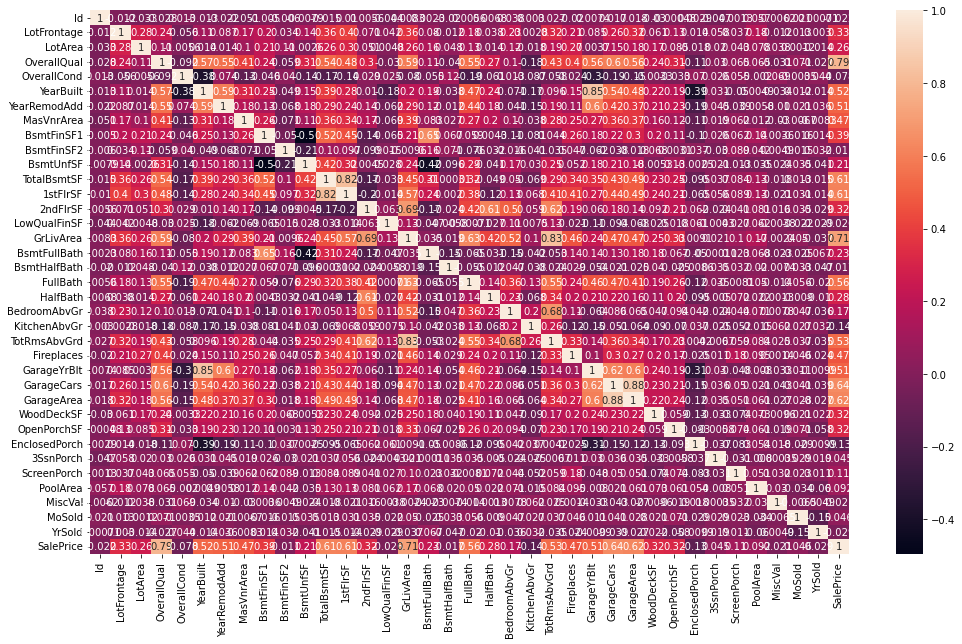

In [37]:
plt.figure(figsize = (17,10))
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:>

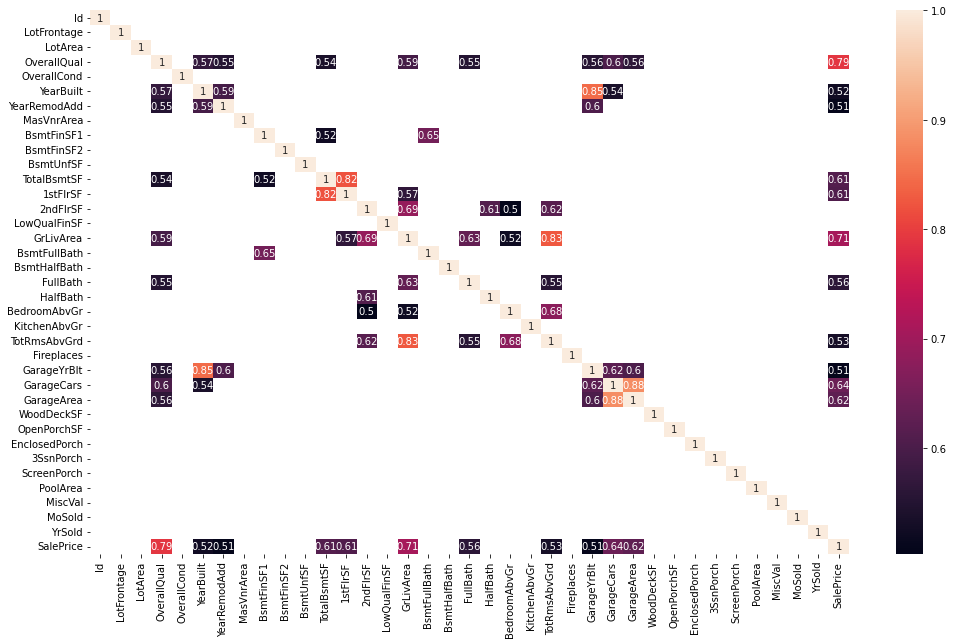

In [38]:
# Let's plot high negavtive and positive correlations, we will select our threshold to be as follows
# More than 0.5 for strong positive correlation and less than - 0.5 for strong negative corerlation
plt.figure(figsize = (17,10))

sns.heatmap(data.corr()[data.corr() > 0.5], annot = True)

## Observations:
- Variables having high positive correlation among independent variables are as follows:
 - GarageYrBlt and YearBuilt
 - GarageCars and GarageArea
 - GrLivArea and TotRmsAbvGrd
 - TotalBsmtSf and 1stflrSf

- Variables having high postive correlation with target variable are as follows:
 - SalesPrice and OverallQual
 - SalesPrice and GrLivArea
 - SalesPrice is somewhat equally correlated with TotalBsmtSf, 1stFlrSF, GarageCars and GarageArea

## Let's plot these columns using pairplots
## We will plots variables which have some correlation with the targeted variable; this will not only help us to understand the relationship better but also help us in proving some linear assumptions further down this notebook 

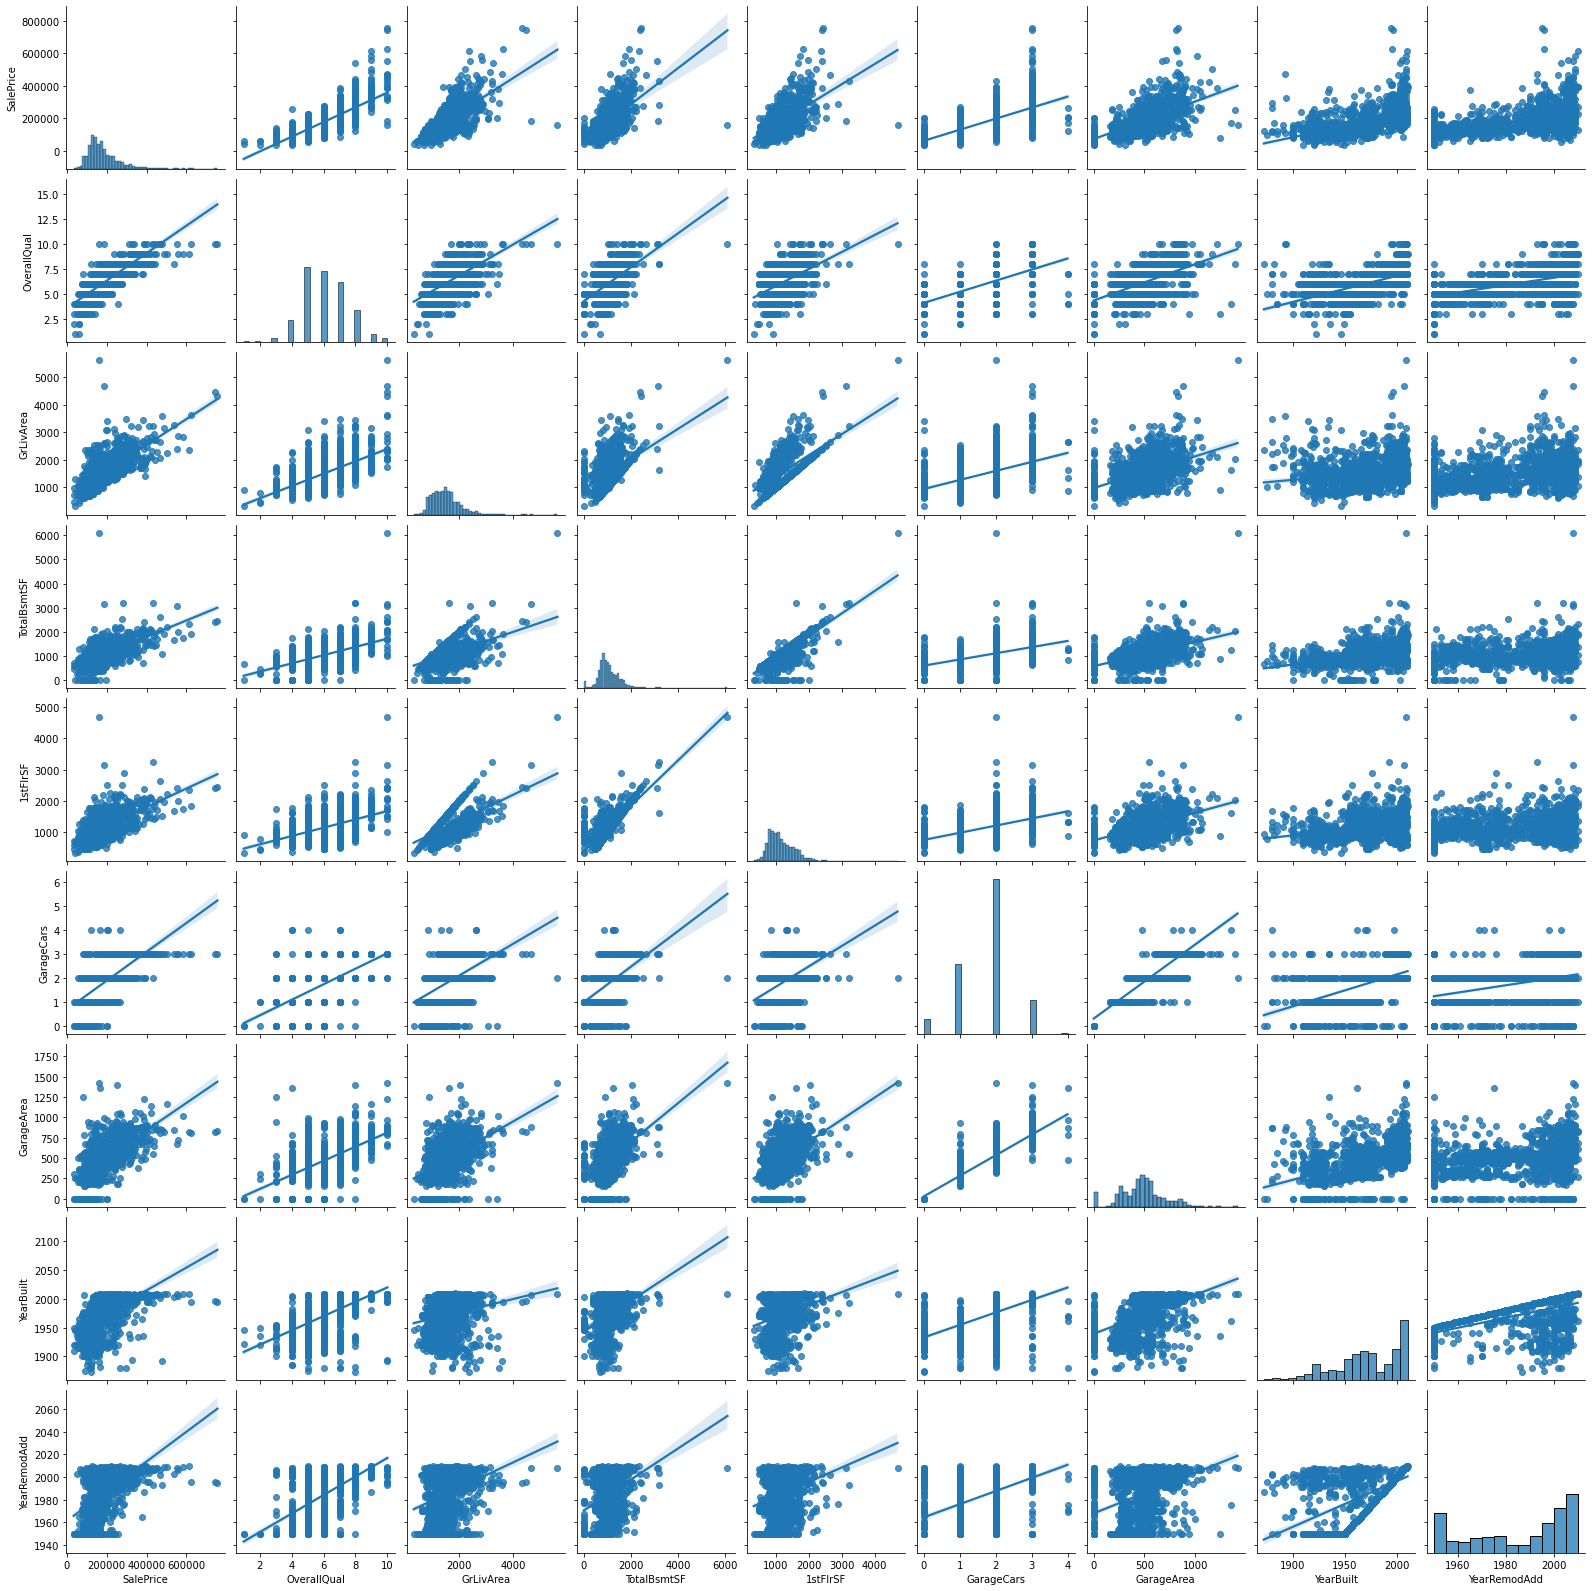

In [39]:
cols_for_pairplot = ["SalePrice", "OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageCars", 
                    "GarageArea", "YearBuilt", "YearRemodAdd"]

# These columns have high or moderate correlation with our target variable

sns.pairplot(data[cols_for_pairplot], kind = "reg")

## Observations:
- SalePrice shows some linearity with GrLivArea, TotalBsmtSF and 1stFlrSF
- This shows that our data is suitable to build a regression model
- As the values in GrLivArea, TotalBsmtSF and 1stFlrSF increases the SalePrice also increases
- YearBuilt also shows some linear relationship with SalePrice
- Also it might not be eminent but OverAll qual has a some linearity with SalePrice

<AxesSubplot:>

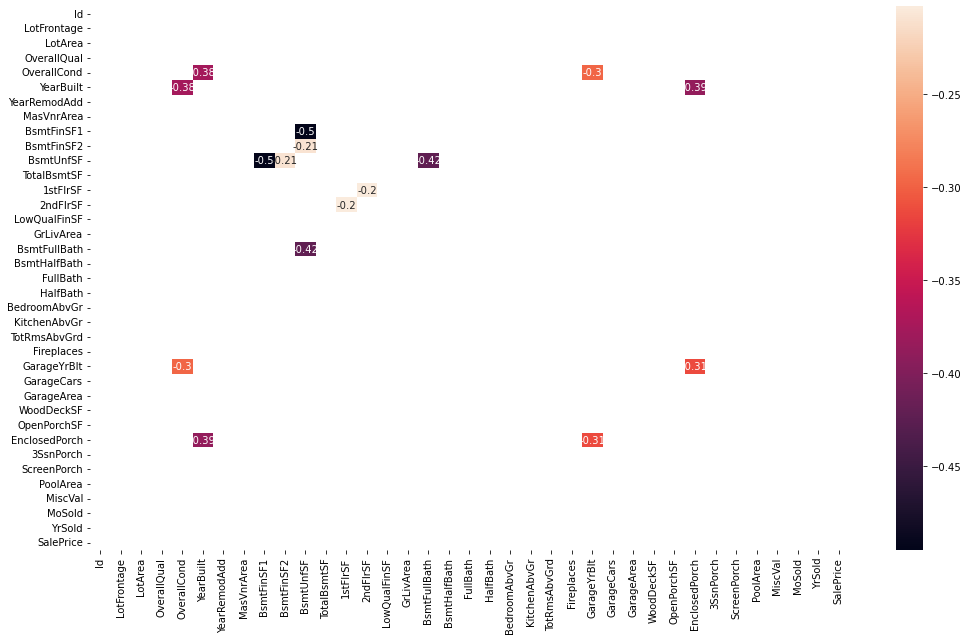

In [40]:

plt.figure(figsize = (17,10))

sns.heatmap(data.corr()[data.corr() <= -0.2], annot = True)

In [41]:
data.select_dtypes("object").columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [42]:
categorical_cols = data.select_dtypes("object").columns

In [43]:
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [44]:
# Let' convert the values in YearBuilt to age of the propert by taking the maximum value of that column and 
# subtracting every value from it, that way we can tell the age of the proeprty; we create a new column anad store
# the age over there
#data["YearBuilt"].max() - data["YearBuilt"]

In [45]:
#data["AgeOfProperty"] = data["YearBuilt"].max() - data["YearBuilt"]

In [46]:
# Let's also observe the YearRemodAdd

data[["YearRemodAdd", "YearBuilt"]]

,YearRemodAdd,YearBuilt
0,2003,2003
1,1976,1976
2,2002,2001
3,1970,1915
4,2000,2000
...,...,...
1455,2000,1999
1456,1988,1978
1457,2006,1941
1458,1996,1950


In [47]:
# As for YearModel; we can convey the same information in terms of after how many years was the property remodelled

# For this we just need to subtract two entities
print(data["YearBuilt"].max())
print(data["YearRemodAdd"].max())
print(data["YrSold"].max())


2010
2010
2010


In [48]:
# The Max values of all the columns related to year is 2010
# So what we can do is convert all of these values of years into Age but subtracting the max value from the 
#rest of the values

data["YearBuilt_Age"] = 2010 - data["YearBuilt"]
data["YearRemodAdd_Age"] = 2010 - data["YearRemodAdd"]
data["YrSold_Age"] = 2010 - data["YrSold"]

In [49]:
# Some Sanity Checks

In [50]:
data[data["YearBuilt"] > data["YearRemodAdd"]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age


In [51]:
data[['YrSold', 'YearBuilt']][data.YrSold < data.YearBuilt]


,YrSold,YearBuilt


In [52]:
# Let's drop YearBuilt, YearRemodAdd and YrSold

data.drop(["YearBuilt", "YearRemodAdd", "YrSold"], axis = 1, inplace = True)

In [53]:
# Let's also impute MoSold
data["MoSold"] = mapping(dataframe = data, column = "MoSold", mappings = [[1,2,3,4,5,6,7,8,9,10,11,12], 
                                                                         ["Jan", "Feb", "Mar", "Apr", "May",
                                                                         "Jun", "Jul", "Aug", "Sep", "Oct",
                                                                         "Nov", "Dec"]])

## Observations:
- As we can see there arent many varaibles which are negatively correlated

In [54]:
# Let's define a fucntion so we can see these values and then use plots to visualize them


In [55]:
def plot_subplot_Count(columns_x, plot_indexes, figsize = (17, 15), rotation = 0, dataframe = data):
    for i,j in zip(columns_x, range(1, len(columns_x)+1)):
        plt.subplot(plot_indexes[0], plot_indexes[1], j)
        univariate_bivariate(x = i, countplot = True, figsize = figsize, rotation = rotation,
                            fontsize = 15)
        plt.tight_layout()
   

## Let's Start with univariate Analysis 

In [56]:
# Let's first load all the categorical columns
data.select_dtypes("object").columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

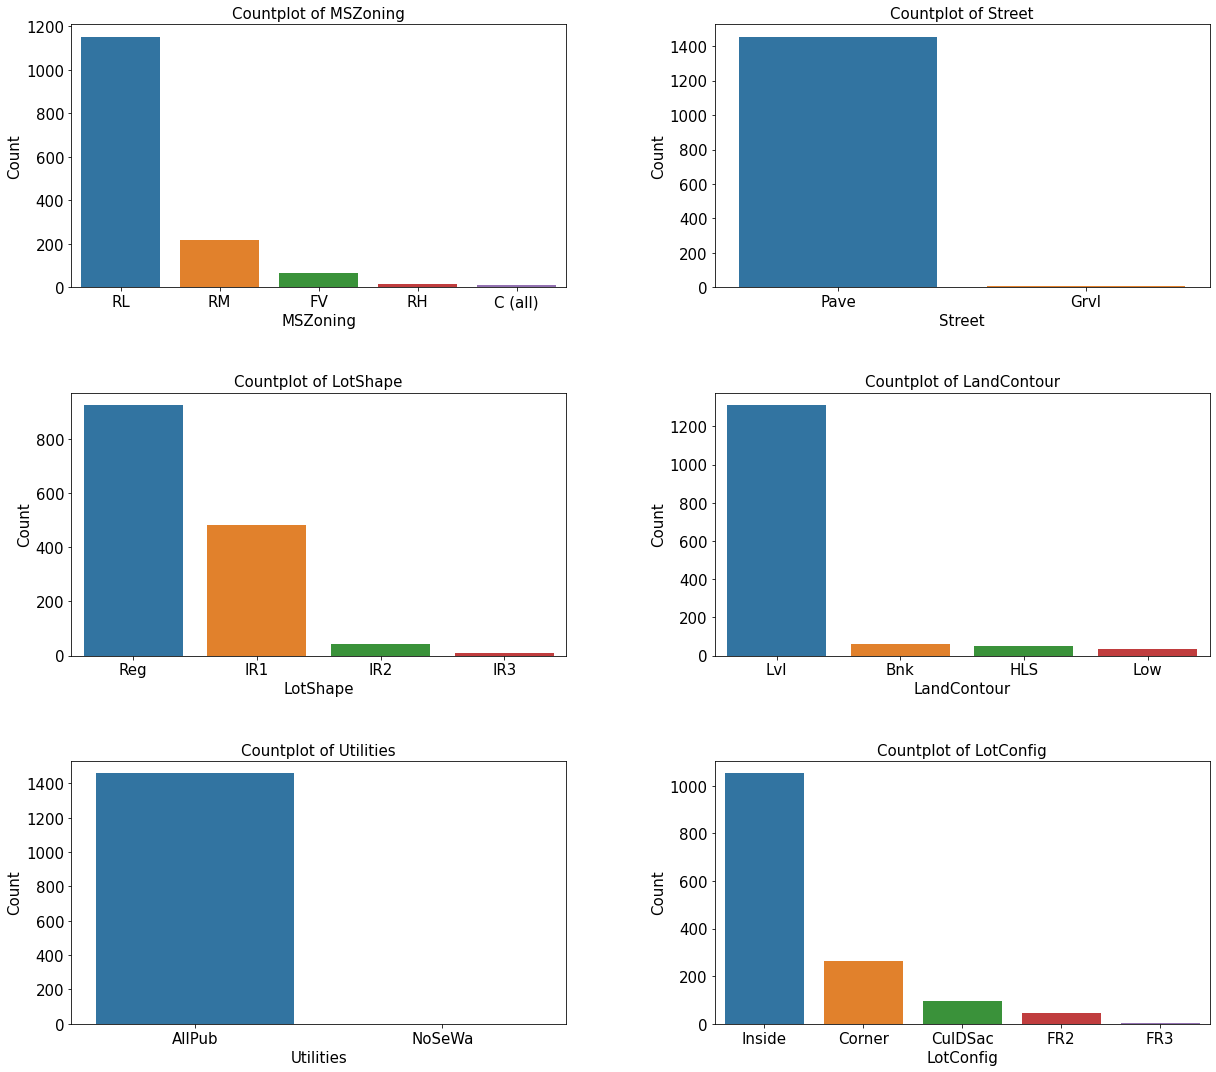

In [57]:
columns_x = ['MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig']
plot_subplot_Count(columns_x = columns_x, plot_indexes = [3,2], figsize = (17, 15))
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

In [58]:
percent_representation(columnames = columns_x)


FOR MSZoning

Count of RL is 1151 which represents about 78.836 of MSZoning
Count of RM is 218 which represents about 14.932 of MSZoning
Count of FV is 65 which represents about 4.452 of MSZoning
Count of RH is 16 which represents about 1.096 of MSZoning
Count of C (all) is 10 which represents about 0.685 of MSZoning

FOR Street

Count of Pave is 1454 which represents about 99.589 of Street
Count of Grvl is 6 which represents about 0.411 of Street

FOR LotShape

Count of Reg is 925 which represents about 63.356 of LotShape
Count of IR1 is 484 which represents about 33.151 of LotShape
Count of IR2 is 41 which represents about 2.808 of LotShape
Count of IR3 is 10 which represents about 0.685 of LotShape

FOR LandContour

Count of Lvl is 1311 which represents about 89.795 of LandContour
Count of Bnk is 63 which represents about 4.315 of LandContour
Count of HLS is 50 which represents about 3.425 of LandContour
Count of Low is 36 which represents about 2.466 of LandContour

FOR Utilities


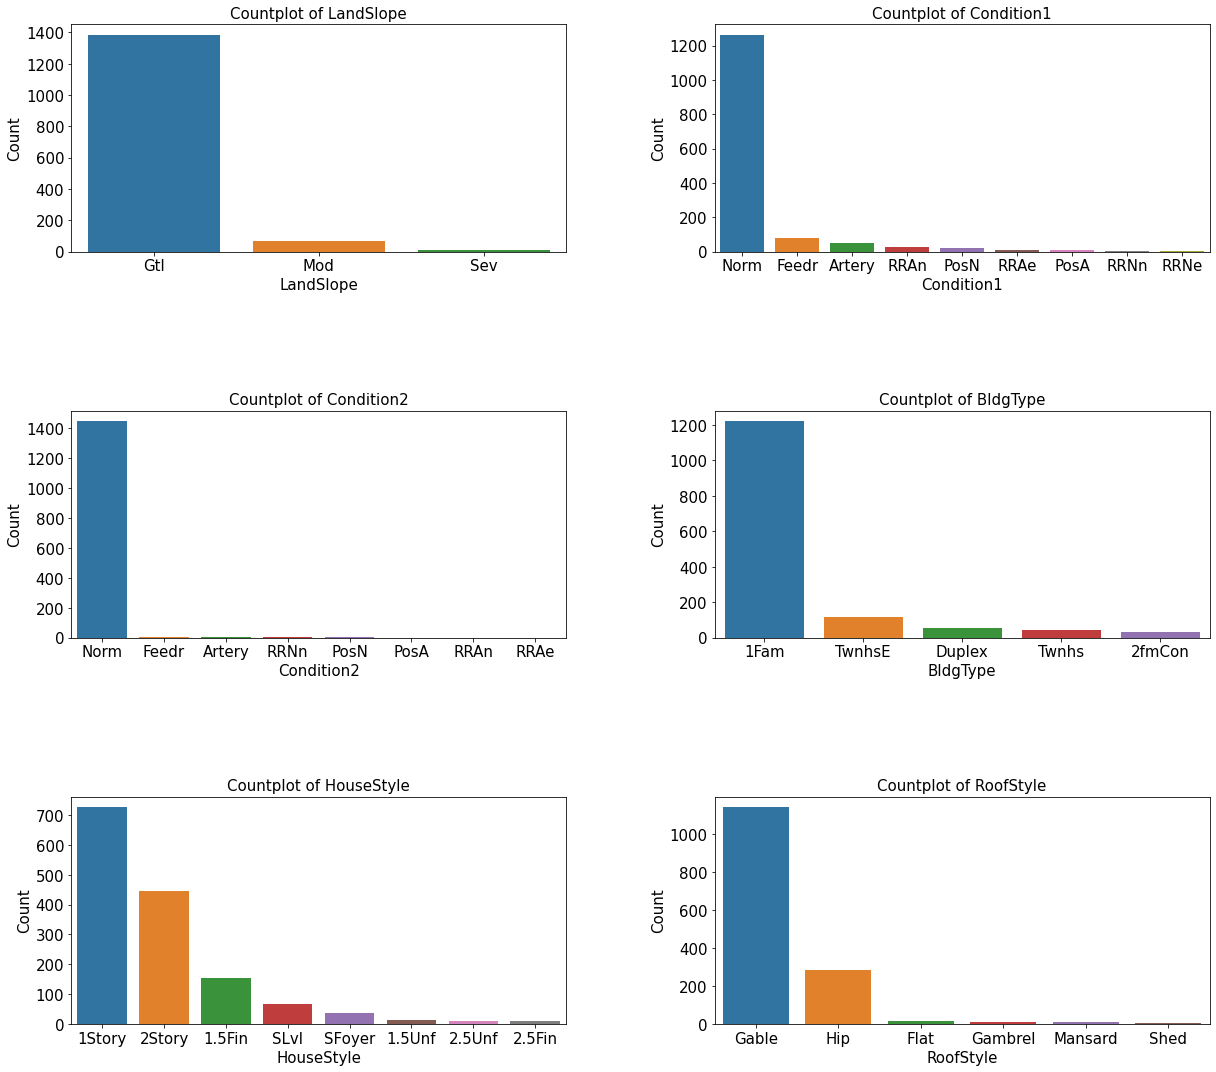

In [59]:
columns_x = ['LandSlope',  'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle']

plot_subplot_Count(columns_x = columns_x, plot_indexes = [3,2], figsize = (17, 15))
plt.subplots_adjust(hspace = 0.7, wspace = 0.3)

In [60]:
percent_representation(columnames = columns_x)


FOR LandSlope

Count of Gtl is 1382 which represents about 94.658 of LandSlope
Count of Mod is 65 which represents about 4.452 of LandSlope
Count of Sev is 13 which represents about 0.89 of LandSlope

FOR Condition1

Count of Norm is 1260 which represents about 86.301 of Condition1
Count of Feedr is 81 which represents about 5.548 of Condition1
Count of Artery is 48 which represents about 3.288 of Condition1
Count of RRAn is 26 which represents about 1.781 of Condition1
Count of PosN is 19 which represents about 1.301 of Condition1
Count of RRAe is 11 which represents about 0.753 of Condition1
Count of PosA is 8 which represents about 0.548 of Condition1
Count of RRNn is 5 which represents about 0.342 of Condition1
Count of RRNe is 2 which represents about 0.137 of Condition1

FOR Condition2

Count of Norm is 1445 which represents about 98.973 of Condition2
Count of Feedr is 6 which represents about 0.411 of Condition2
Count of Artery is 2 which represents about 0.137 of Condition2
Co

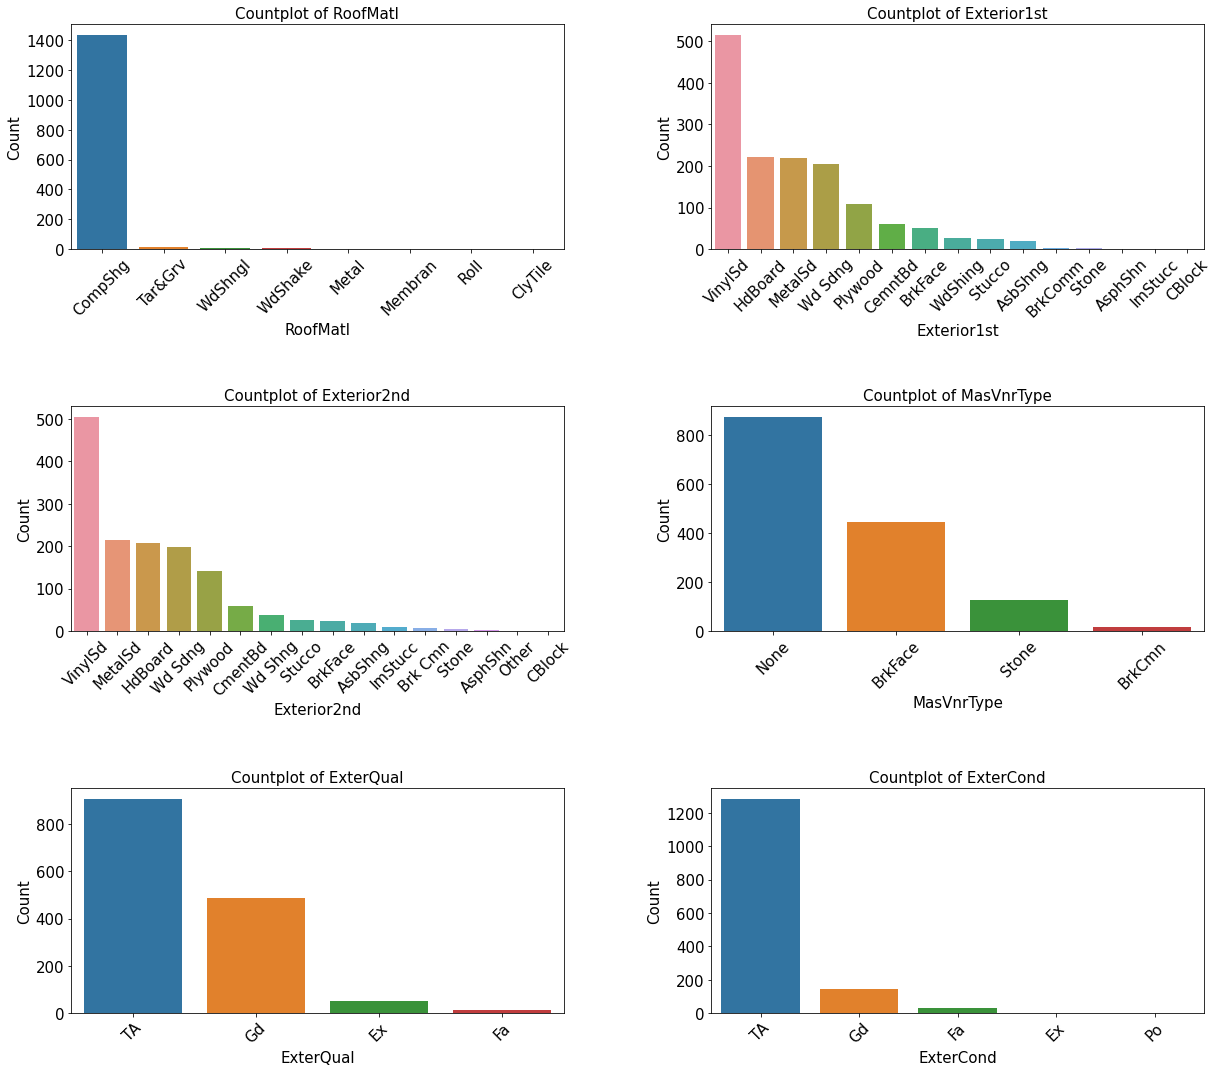

In [61]:
columns_x = ['RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond']

plot_subplot_Count(columns_x = columns_x, plot_indexes = [3,2], figsize = (17, 15), rotation=45)
plt.subplots_adjust(hspace = 0.7, wspace = 0.3)

In [62]:
percent_representation(columnames = columns_x)


FOR RoofMatl

Count of CompShg is 1434 which represents about 98.219 of RoofMatl
Count of Tar&Grv is 11 which represents about 0.753 of RoofMatl
Count of WdShngl is 6 which represents about 0.411 of RoofMatl
Count of WdShake is 5 which represents about 0.342 of RoofMatl
Count of Metal is 1 which represents about 0.068 of RoofMatl
Count of Membran is 1 which represents about 0.068 of RoofMatl
Count of Roll is 1 which represents about 0.068 of RoofMatl
Count of ClyTile is 1 which represents about 0.068 of RoofMatl

FOR Exterior1st

Count of VinylSd is 515 which represents about 35.274 of Exterior1st
Count of HdBoard is 222 which represents about 15.205 of Exterior1st
Count of MetalSd is 220 which represents about 15.068 of Exterior1st
Count of Wd Sdng is 206 which represents about 14.11 of Exterior1st
Count of Plywood is 108 which represents about 7.397 of Exterior1st
Count of CemntBd is 61 which represents about 4.178 of Exterior1st
Count of BrkFace is 50 which represents about 3.425 o

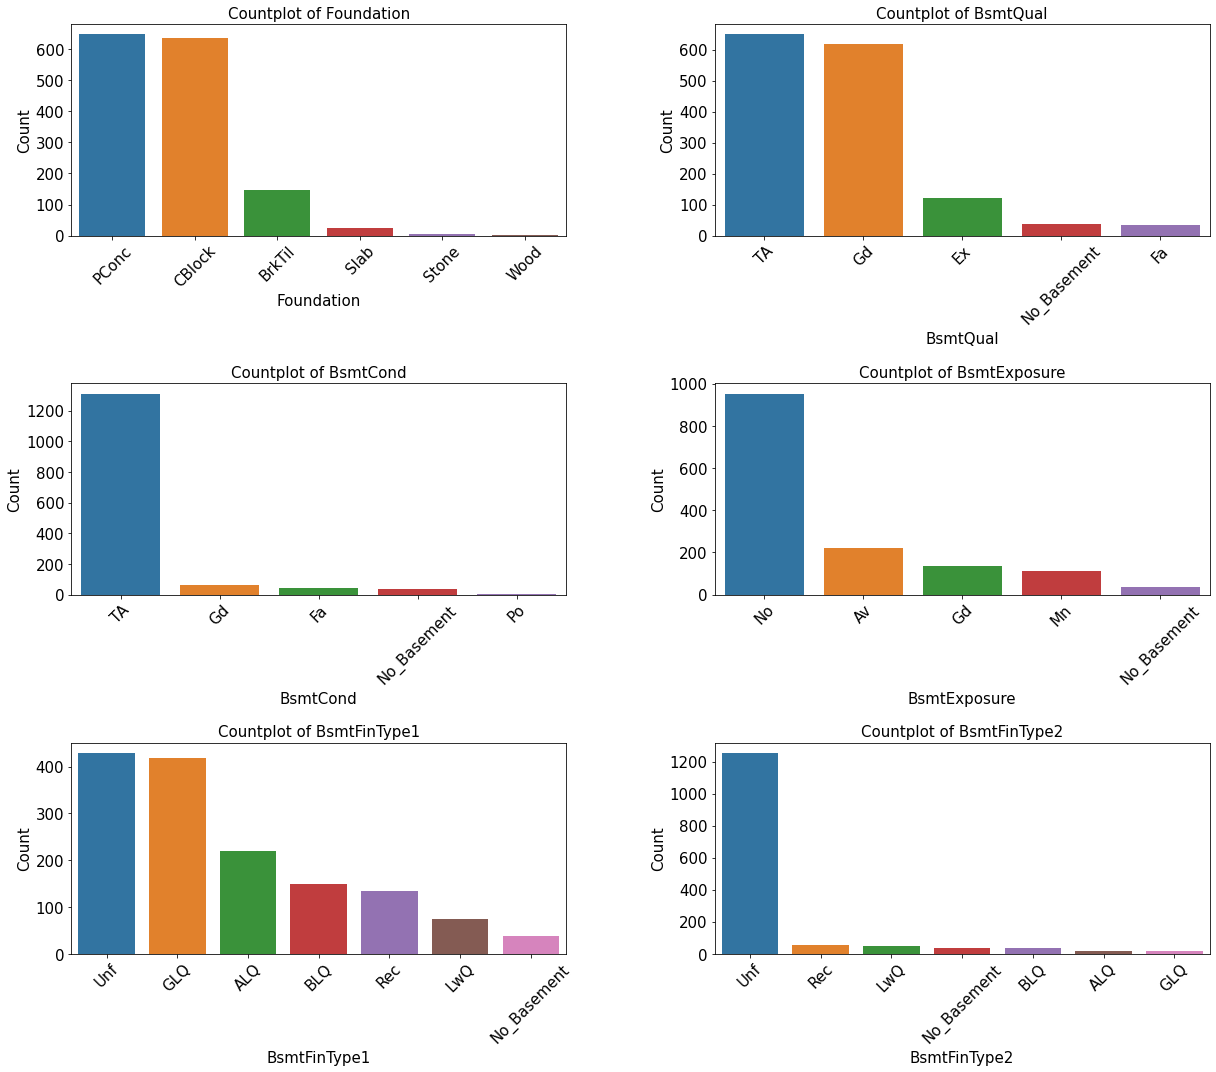

In [63]:
columns_x = ['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2']

plot_subplot_Count(columns_x = columns_x, plot_indexes = [3,2], figsize = (17, 15), rotation=45)
plt.subplots_adjust(hspace = 0.7, wspace = 0.3)

In [64]:
percent_representation(columnames = columns_x)


FOR Foundation

Count of PConc is 647 which represents about 44.315 of Foundation
Count of CBlock is 634 which represents about 43.425 of Foundation
Count of BrkTil is 146 which represents about 10.0 of Foundation
Count of Slab is 24 which represents about 1.644 of Foundation
Count of Stone is 6 which represents about 0.411 of Foundation
Count of Wood is 3 which represents about 0.205 of Foundation

FOR BsmtQual

Count of TA is 649 which represents about 44.452 of BsmtQual
Count of Gd is 618 which represents about 42.329 of BsmtQual
Count of Ex is 121 which represents about 8.288 of BsmtQual
Count of No_Basement is 37 which represents about 2.534 of BsmtQual
Count of Fa is 35 which represents about 2.397 of BsmtQual

FOR BsmtCond

Count of TA is 1311 which represents about 89.795 of BsmtCond
Count of Gd is 65 which represents about 4.452 of BsmtCond
Count of Fa is 45 which represents about 3.082 of BsmtCond
Count of No_Basement is 37 which represents about 2.534 of BsmtCond
Count of P

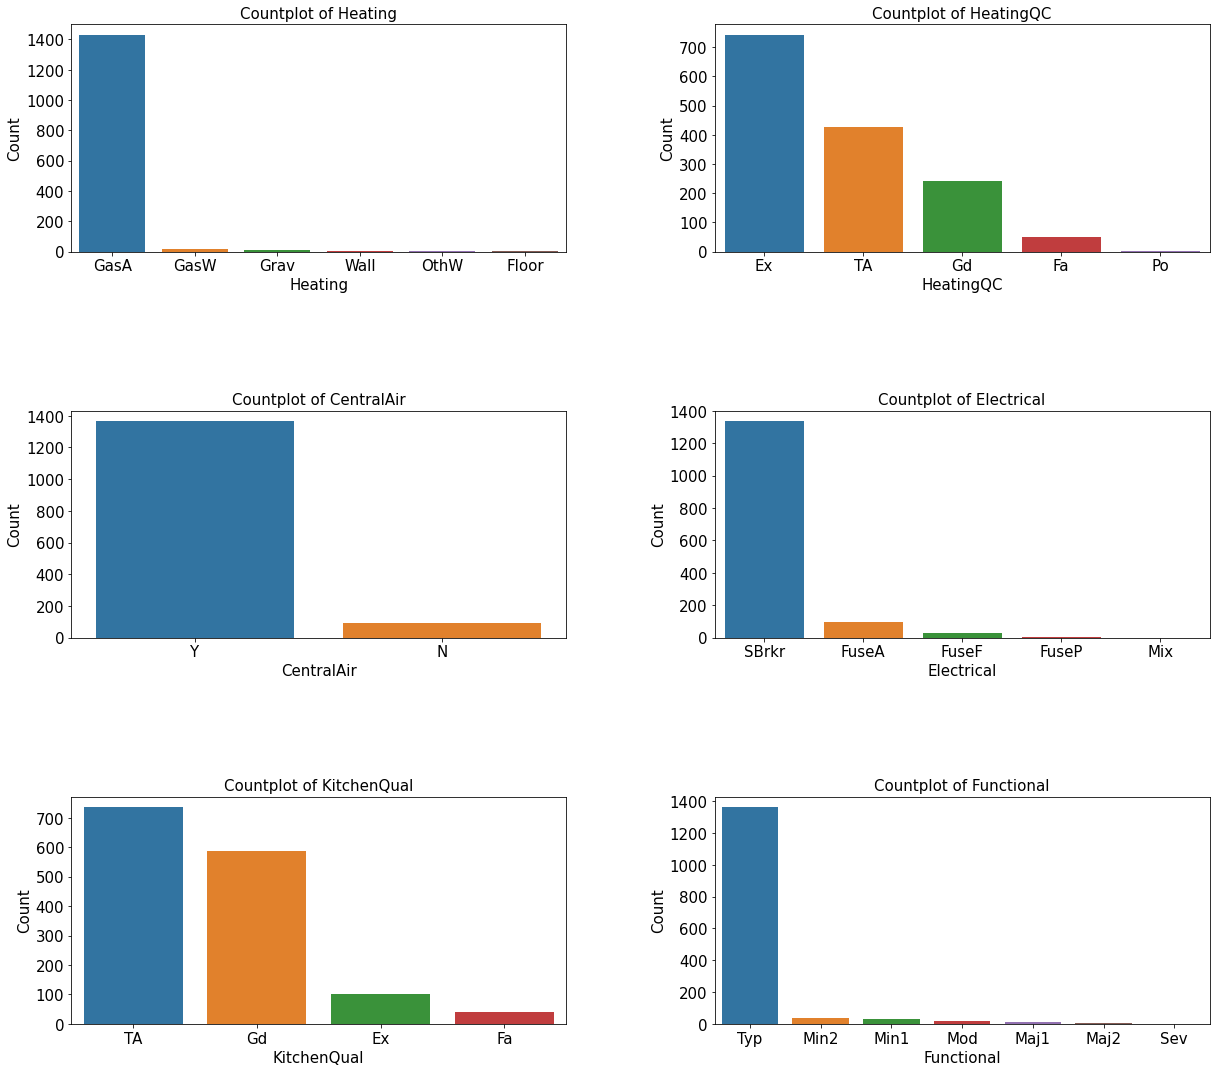

In [65]:
columns_x = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical',
            'KitchenQual', 'Functional']

plot_subplot_Count(columns_x = columns_x, plot_indexes = [3,2], figsize = (17, 15))
plt.subplots_adjust(hspace = 0.7, wspace = 0.3)

In [66]:
percent_representation(columnames = columns_x)


FOR Heating

Count of GasA is 1428 which represents about 97.808 of Heating
Count of GasW is 18 which represents about 1.233 of Heating
Count of Grav is 7 which represents about 0.479 of Heating
Count of Wall is 4 which represents about 0.274 of Heating
Count of OthW is 2 which represents about 0.137 of Heating
Count of Floor is 1 which represents about 0.068 of Heating

FOR HeatingQC

Count of Ex is 741 which represents about 50.753 of HeatingQC
Count of TA is 428 which represents about 29.315 of HeatingQC
Count of Gd is 241 which represents about 16.507 of HeatingQC
Count of Fa is 49 which represents about 3.356 of HeatingQC
Count of Po is 1 which represents about 0.068 of HeatingQC

FOR CentralAir

Count of Y is 1365 which represents about 93.493 of CentralAir
Count of N is 95 which represents about 6.507 of CentralAir

FOR Electrical

Count of SBrkr is 1335 which represents about 91.438 of Electrical
Count of FuseA is 94 which represents about 6.438 of Electrical
Count of FuseF is

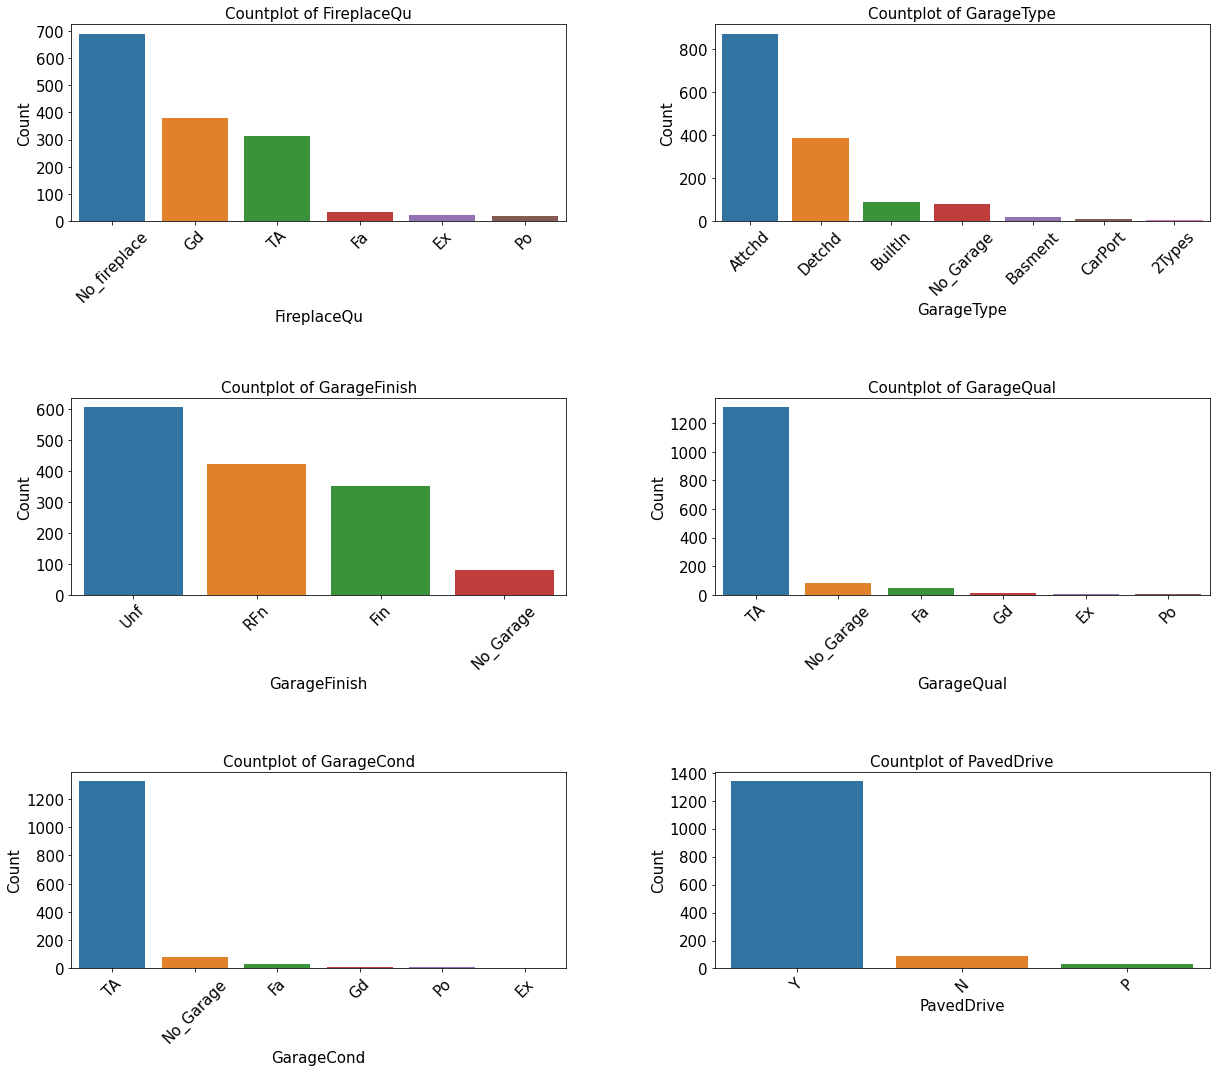

In [67]:
columns_x = ['FireplaceQu', 'GarageType',
           'GarageFinish', 'GarageQual', 
             'GarageCond', 'PavedDrive']

plot_subplot_Count(columns_x = columns_x, plot_indexes = [3,2], figsize = (17, 15), rotation = 45)
plt.subplots_adjust(hspace = 0.9, wspace = 0.3)

In [68]:
percent_representation(columnames = columns_x)


FOR FireplaceQu

Count of No_fireplace is 690 which represents about 47.26 of FireplaceQu
Count of Gd is 380 which represents about 26.027 of FireplaceQu
Count of TA is 313 which represents about 21.438 of FireplaceQu
Count of Fa is 33 which represents about 2.26 of FireplaceQu
Count of Ex is 24 which represents about 1.644 of FireplaceQu
Count of Po is 20 which represents about 1.37 of FireplaceQu

FOR GarageType

Count of Attchd is 870 which represents about 59.589 of GarageType
Count of Detchd is 387 which represents about 26.507 of GarageType
Count of BuiltIn is 88 which represents about 6.027 of GarageType
Count of No_Garage is 81 which represents about 5.548 of GarageType
Count of Basment is 19 which represents about 1.301 of GarageType
Count of CarPort is 9 which represents about 0.616 of GarageType
Count of 2Types is 6 which represents about 0.411 of GarageType

FOR GarageFinish

Count of Unf is 605 which represents about 41.438 of GarageFinish
Count of RFn is 422 which repres

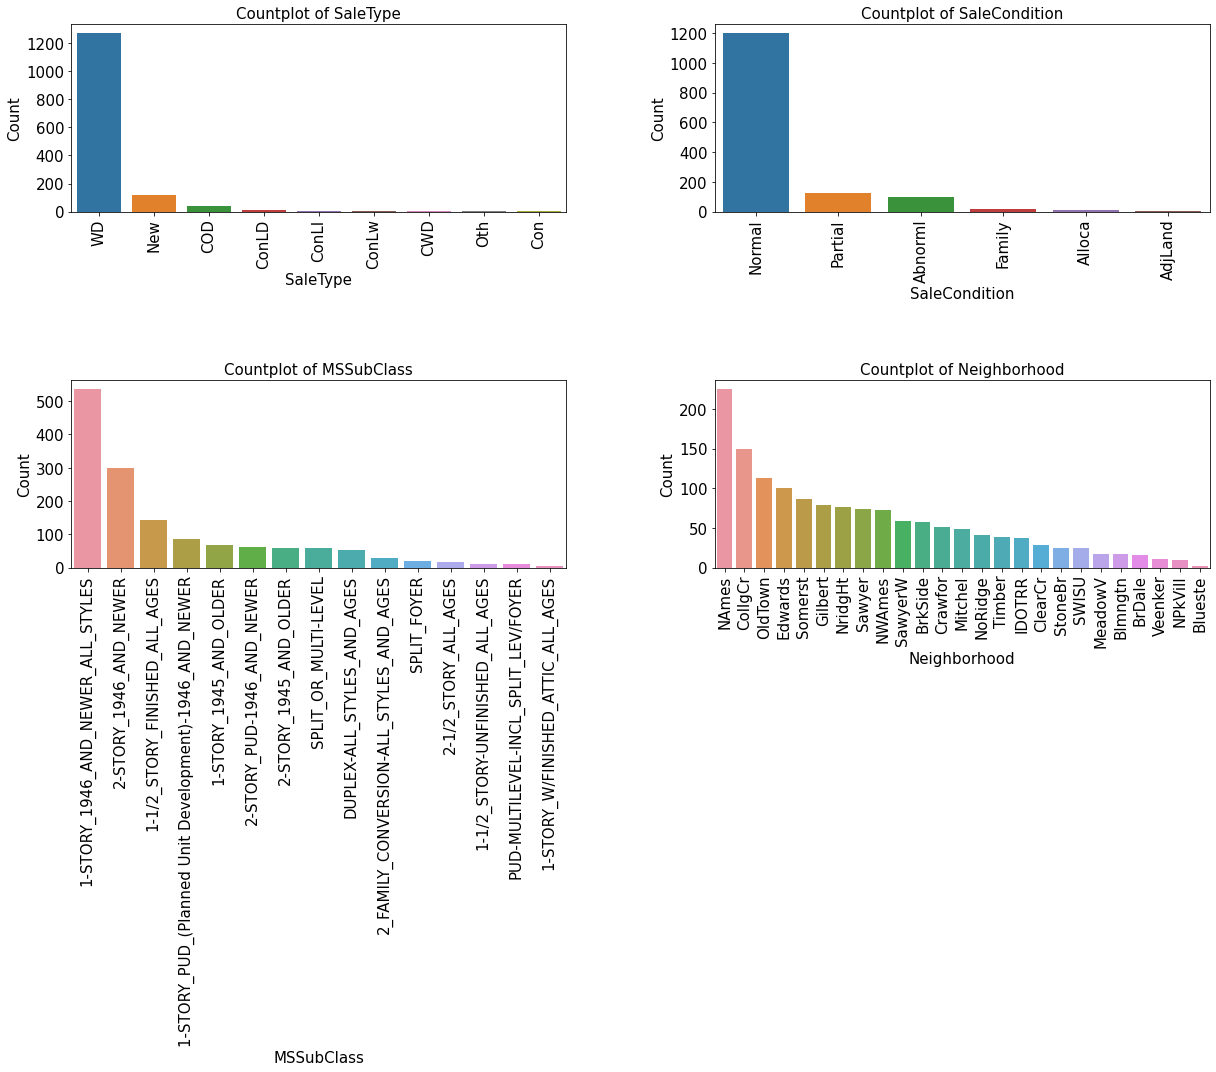

In [69]:
columns_x = ['SaleType', 'SaleCondition', 'MSSubClass', 'Neighborhood']

plot_subplot_Count(columns_x = columns_x, plot_indexes = [2,2], figsize = (17, 15), rotation = 90)
plt.subplots_adjust(hspace = 0.9, wspace = 0.3)

In [70]:
percent_representation(columnames = columns_x)


FOR SaleType

Count of WD is 1267 which represents about 86.781 of SaleType
Count of New is 122 which represents about 8.356 of SaleType
Count of COD is 43 which represents about 2.945 of SaleType
Count of ConLD is 9 which represents about 0.616 of SaleType
Count of ConLI is 5 which represents about 0.342 of SaleType
Count of ConLw is 5 which represents about 0.342 of SaleType
Count of CWD is 4 which represents about 0.274 of SaleType
Count of Oth is 3 which represents about 0.205 of SaleType
Count of Con is 2 which represents about 0.137 of SaleType

FOR SaleCondition

Count of Normal is 1198 which represents about 82.055 of SaleCondition
Count of Partial is 125 which represents about 8.562 of SaleCondition
Count of Abnorml is 101 which represents about 6.918 of SaleCondition
Count of Family is 20 which represents about 1.37 of SaleCondition
Count of Alloca is 12 which represents about 0.822 of SaleCondition
Count of AdjLand is 4 which represents about 0.274 of SaleCondition

FOR MSS

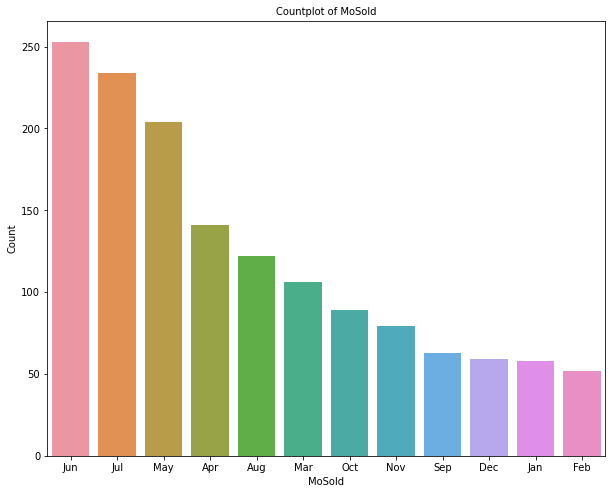

In [71]:
univariate_bivariate(x = "MoSold", countplot=True)

## observations :
- Most number of Sale happen between May and July (May and July inclusive)

In [72]:
# Now based on our observations we will eliminate columns which rae highly skwed wwe will take our threshold to be
# 0.80

columns_to_eliminate = []
for i in data.select_dtypes("object"):
    if any(data[i].value_counts().values/data.shape[0] >= 0.80):
        columns_to_eliminate.append(i)
    
columns_to_eliminate   

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [73]:
# Based on the results obtained above we can safely eliminate these columns based on high skweness

data.drop(columns_to_eliminate, axis = 1, inplace = True)
data.shape

(1460, 57)

In [74]:
# Also since we are dealing with Year column it is neccessary to convert this column into age as well
data["GarageYearBuilt_Age"] = 2010.0 - data["GarageYrBlt"]
data.drop("GarageYrBlt", axis = 1, inplace = True)

<AxesSubplot:>

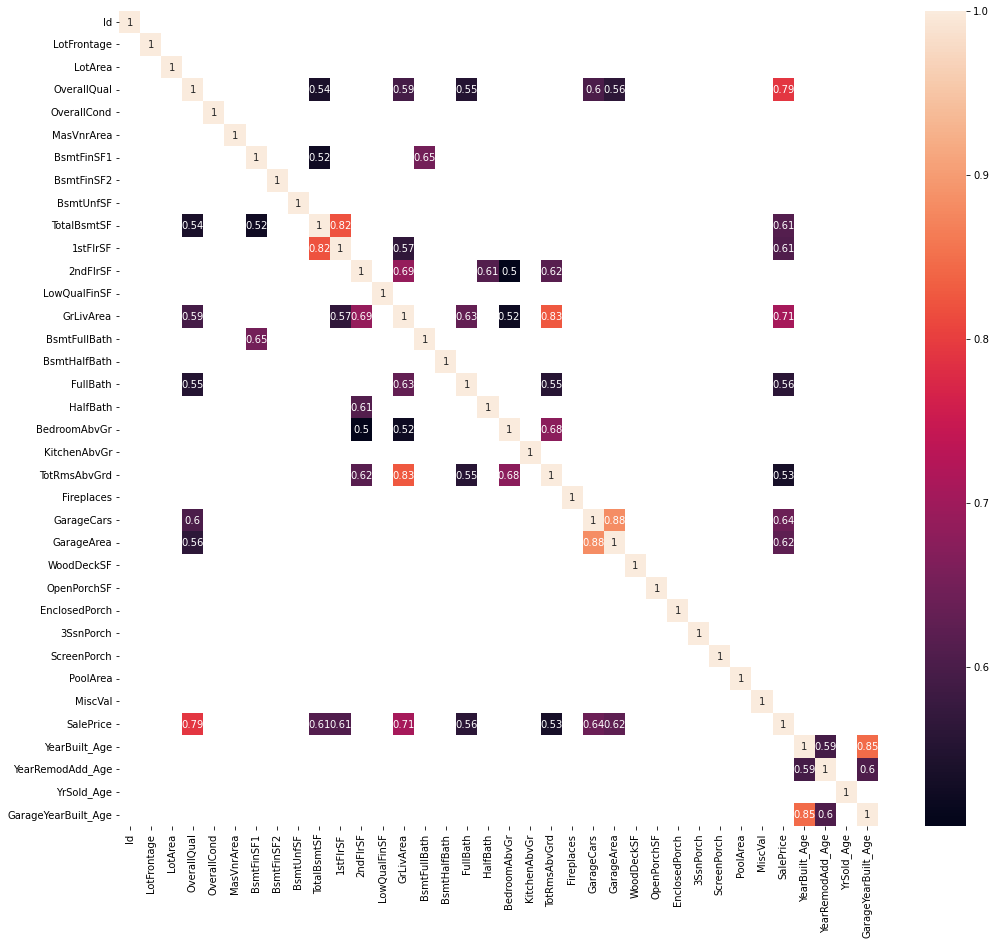

In [75]:
plt.figure(figsize = (17,15))
sns.heatmap(data.corr()[data.corr() >= 0.5], annot = True)


In [76]:
# Furthermore we will eliminate columns which have high correlation with independent variables except for our 
# targeted variable

data.drop(["Id", "GarageYearBuilt_Age", "1stFlrSF", "GarageArea", "TotRmsAbvGrd"], axis = 1, inplace = True)

## Observation and Conclusion from univariate analysis:
   
   ### Observations:
   - Countplots could only convey so much as how abundant that feature is in our data set, we found some extremely        skewed values despite removing some columns in the beginning of our analysis; following are the columns having more    than 80% of the same values
 'LandContour','Utilities',
 'LandSlope','Condition1',
 'Condition2','BldgType',
 'RoofMatl','ExterCond',
 'BsmtCond','BsmtFinType2',
 'Heating','CentralAir',
 'Electrical','Functional',
 'GarageQual','GarageCond',
 'PavedDrive','SaleType', 'SaleCondition'
 
 - Now natuarally we had to choice but to eliminate this columns and it didnt make any sesne logically to keep them in    our dataset as it affected our Mean and Median making our analysis highly unreliable
 
 ### Counclusions:
 - From Univariate Analysis for categorical variables we conclude that the above mentioend columns are highly            unreliable having said that it could also mean that in Australia the majority or the most common types preferred      are the features in those columns but this will be prove to be a hinderence in our model beginning  and in decision    making as it will affect our analysis

## Univariate analysis for numerical variables


In [77]:
# We will plot a box plot and a histogram to see the ditsribution
# Let's define a fucntion which will do everything we need for us


def box_hist(columns_x, plot_indexes, figsize = (17, 15), rotation = 0, dataframe = data):
    for name, index in zip(columns_x, range(1, (len(columns_x)*2) + 1, 2)):
        plt.subplot(plot_indexes[0], plot_indexes[1], index)
        univariate_bivariate(x = name, histogram = True, figsize = figsize, rotation=rotation, fontsize=13)
           
    for name, index in zip(columns_x, range(2, (len(columns_x)*2) + 1, 2)):
        plt.subplot(plot_indexes[0], plot_indexes[1], index)
        univariate_bivariate(x = name, boxplot = True, figsize = figsize, rotation=rotation, fontsize=13)
        plt.title(f"BoxPlot of {name}")
            
    plt.tight_layout()
    plt.subplots_adjust(hspace = 0.4)
    
    
   

In [78]:
# Let's check all the numerical columns

data.select_dtypes(["int", "float"]).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearBuilt_Age',
       'YearRemodAdd_Age', 'YrSold_Age'],
      dtype='object')

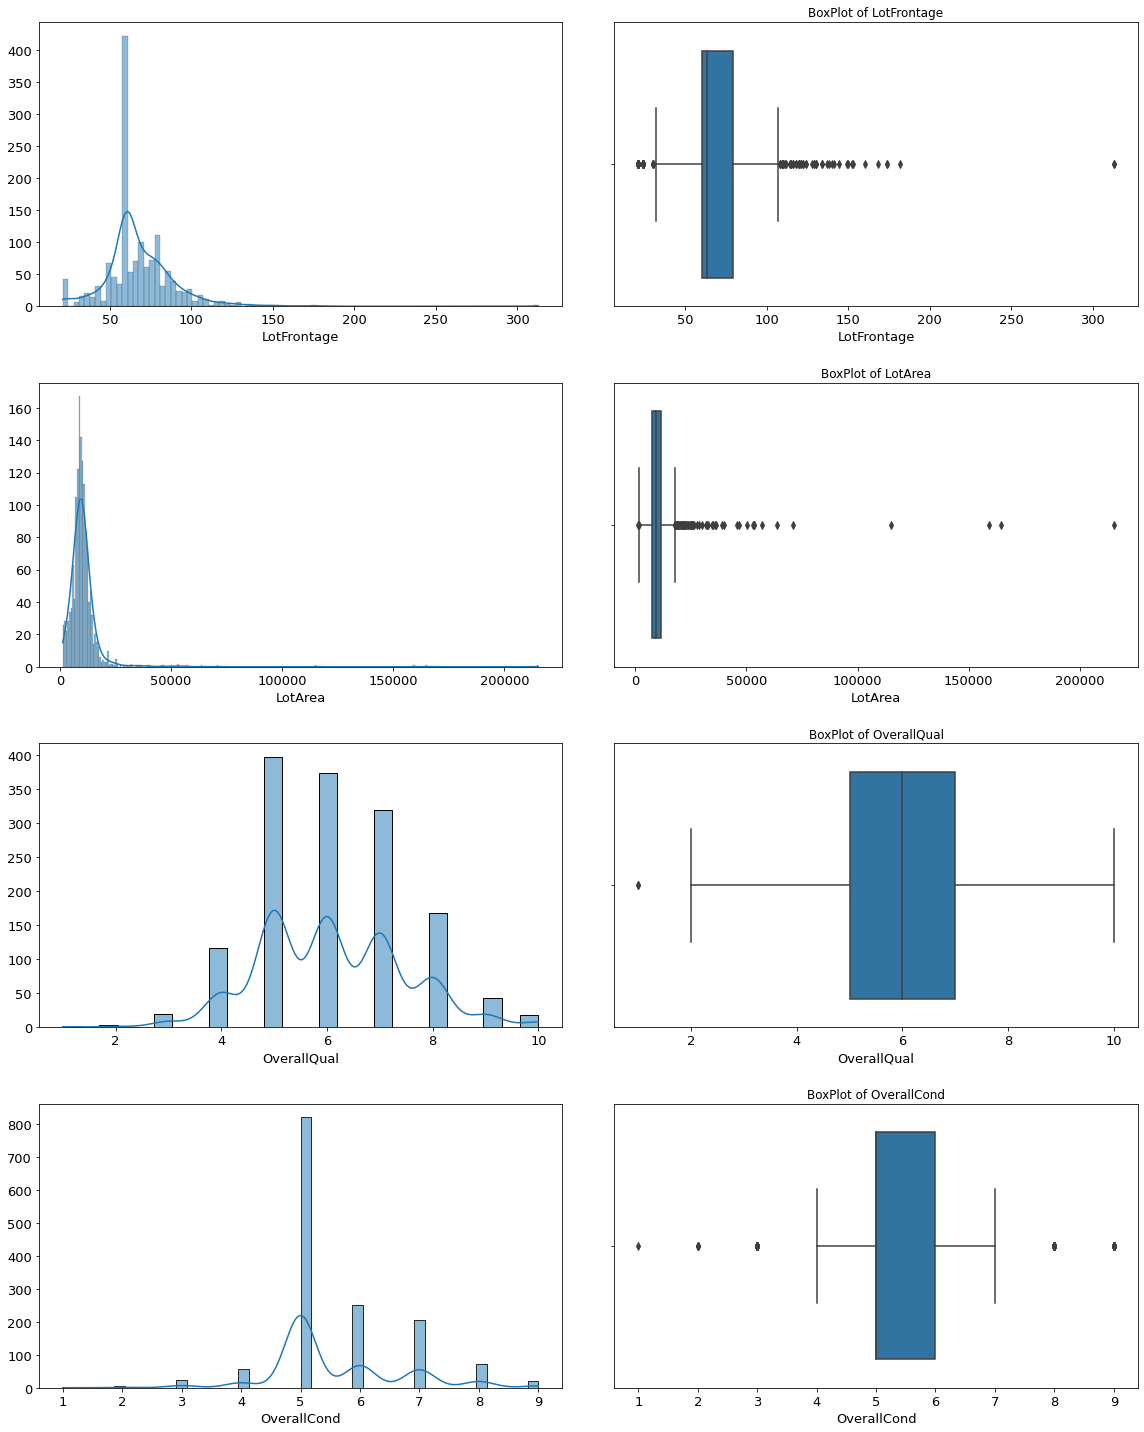

In [79]:
box_hist(columns_x = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'], 
         plot_indexes = [4,2], figsize = (16, 20))
plt.subplots_adjust(hspace = 0.27, wspace=0.1)

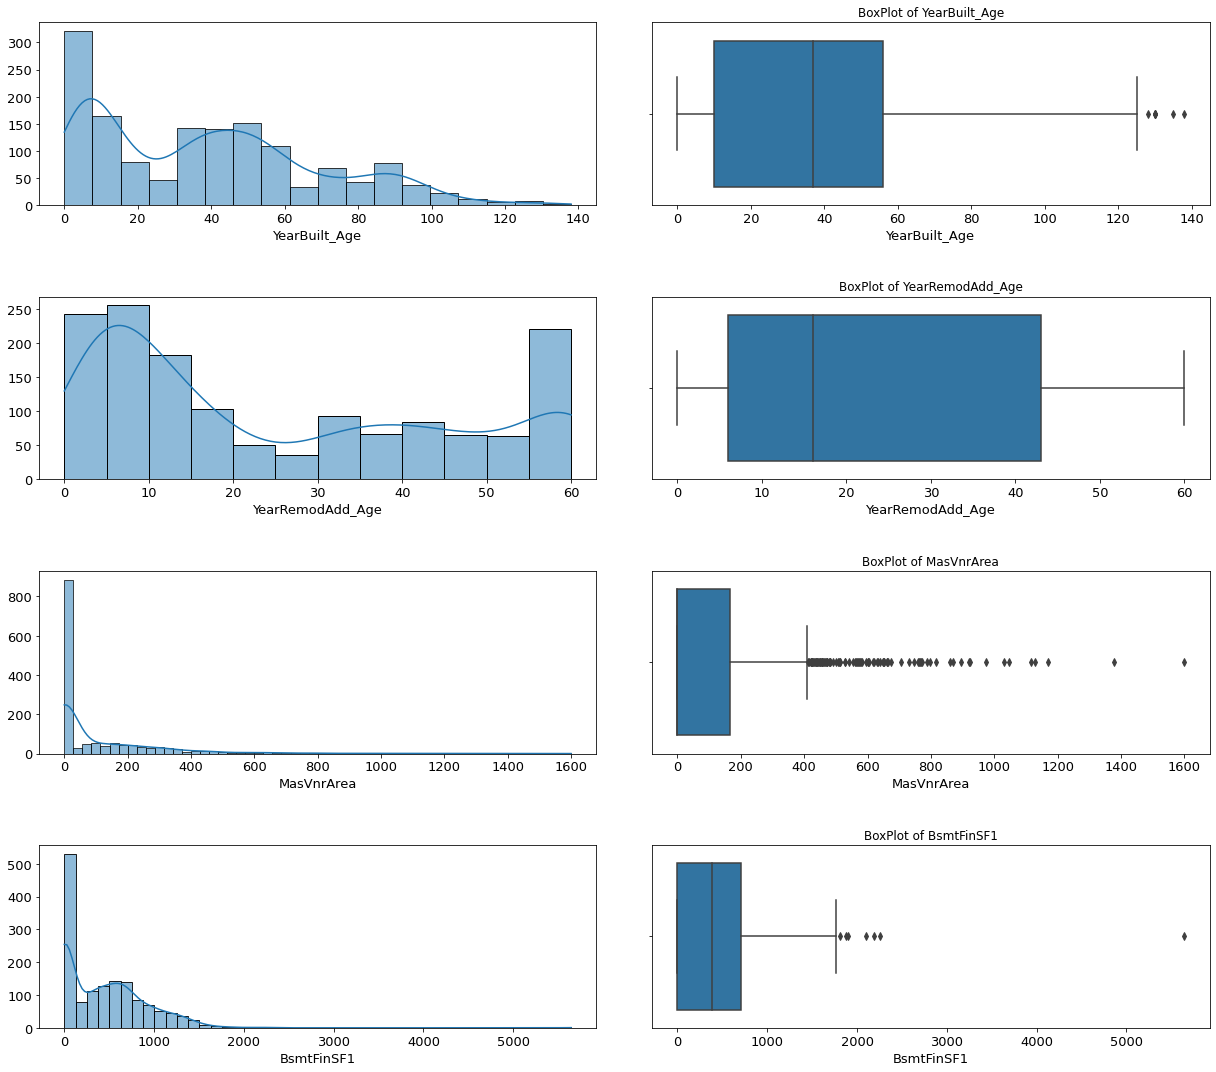

In [80]:
box_hist(columns_x = ['YearBuilt_Age','YearRemodAdd_Age', 'MasVnrArea', 'BsmtFinSF1'], 
         plot_indexes = [4, 2], figsize = (17, 15))


plt.subplots_adjust(hspace = 0.5, wspace=0.1)

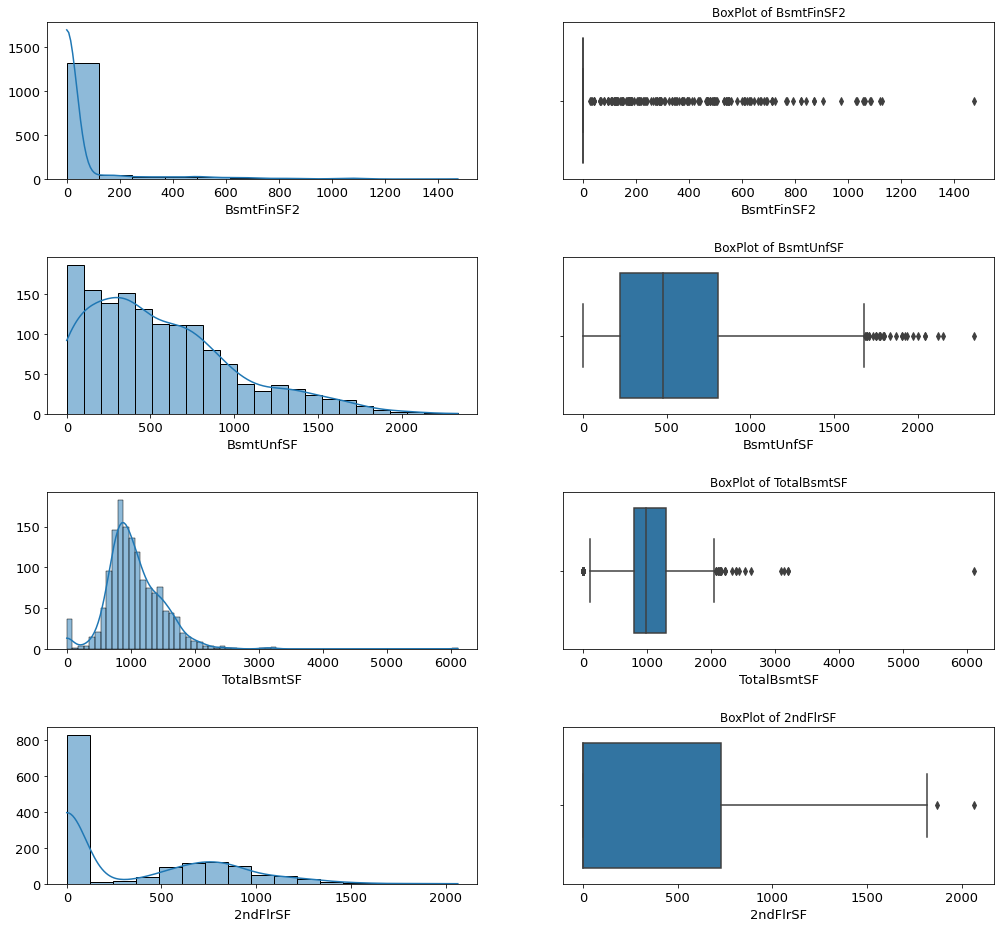

In [81]:
box_hist(columns_x = [ 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '2ndFlrSF'], 
         plot_indexes = [4,2], figsize = (14, 13))
plt.subplots_adjust(hspace = 0.5, wspace=0.2)

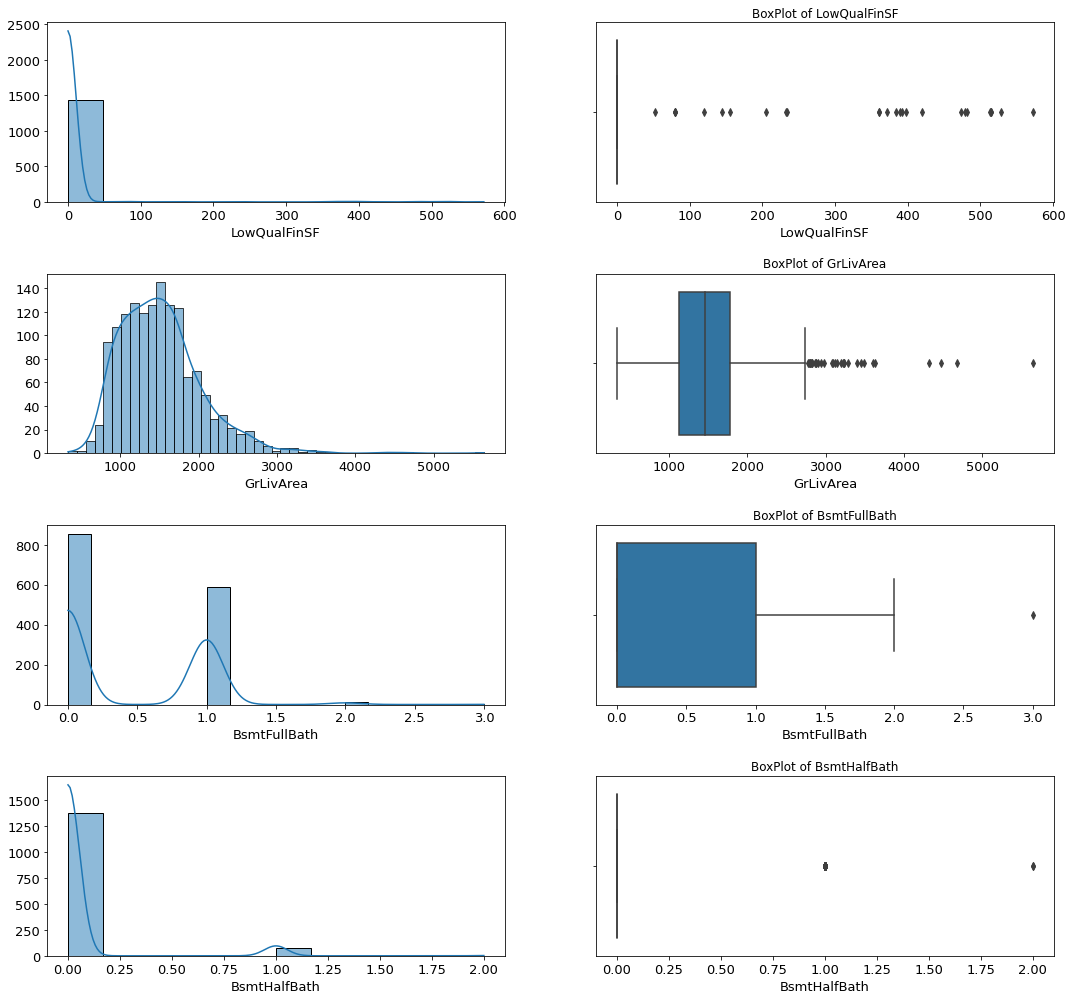

In [82]:
box_hist(columns_x = ['LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath'], 
         plot_indexes = [4,2], figsize = (15, 14))
plt.subplots_adjust(hspace = 0.4, wspace=0.2)

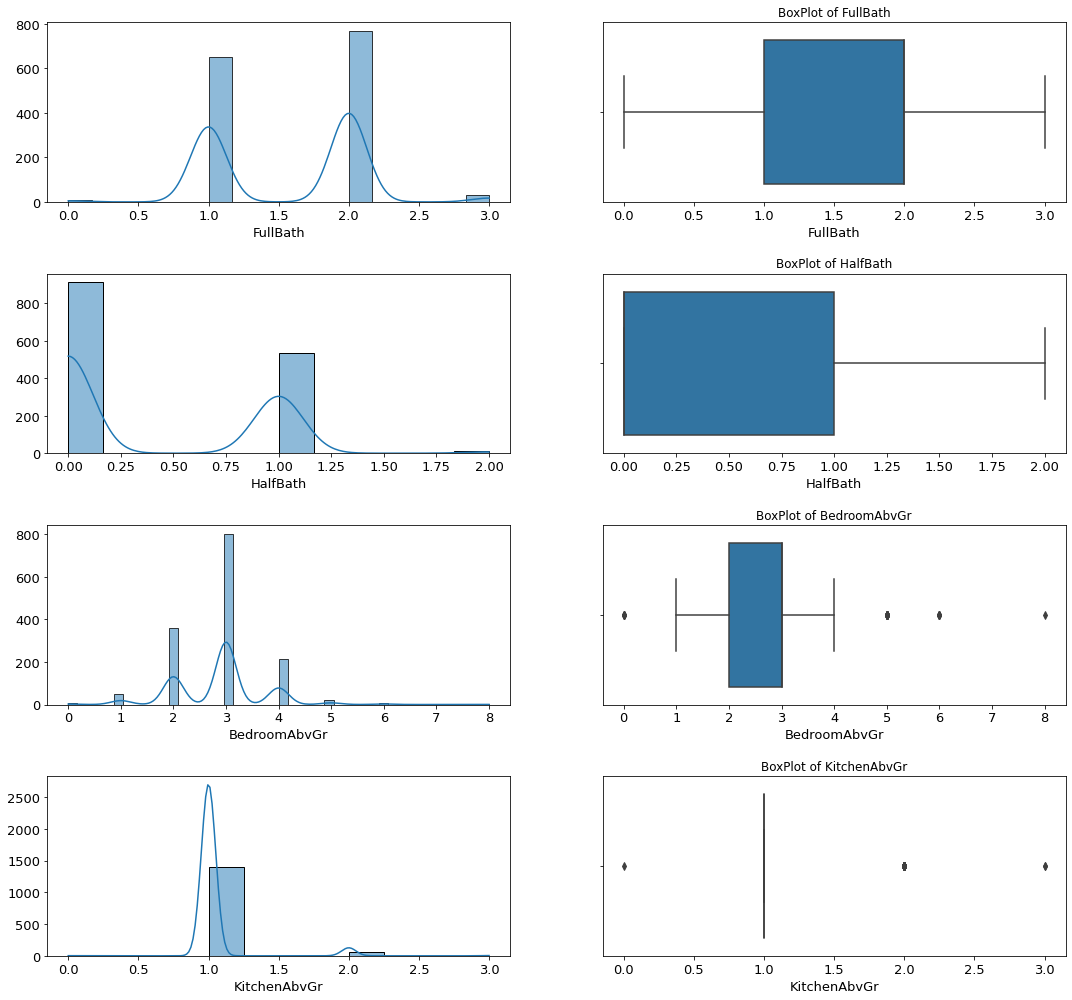

In [83]:
box_hist(columns_x = ['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'], 
         plot_indexes = [4,2], figsize = (15, 14))
plt.subplots_adjust(hspace = 0.4, wspace=0.2)

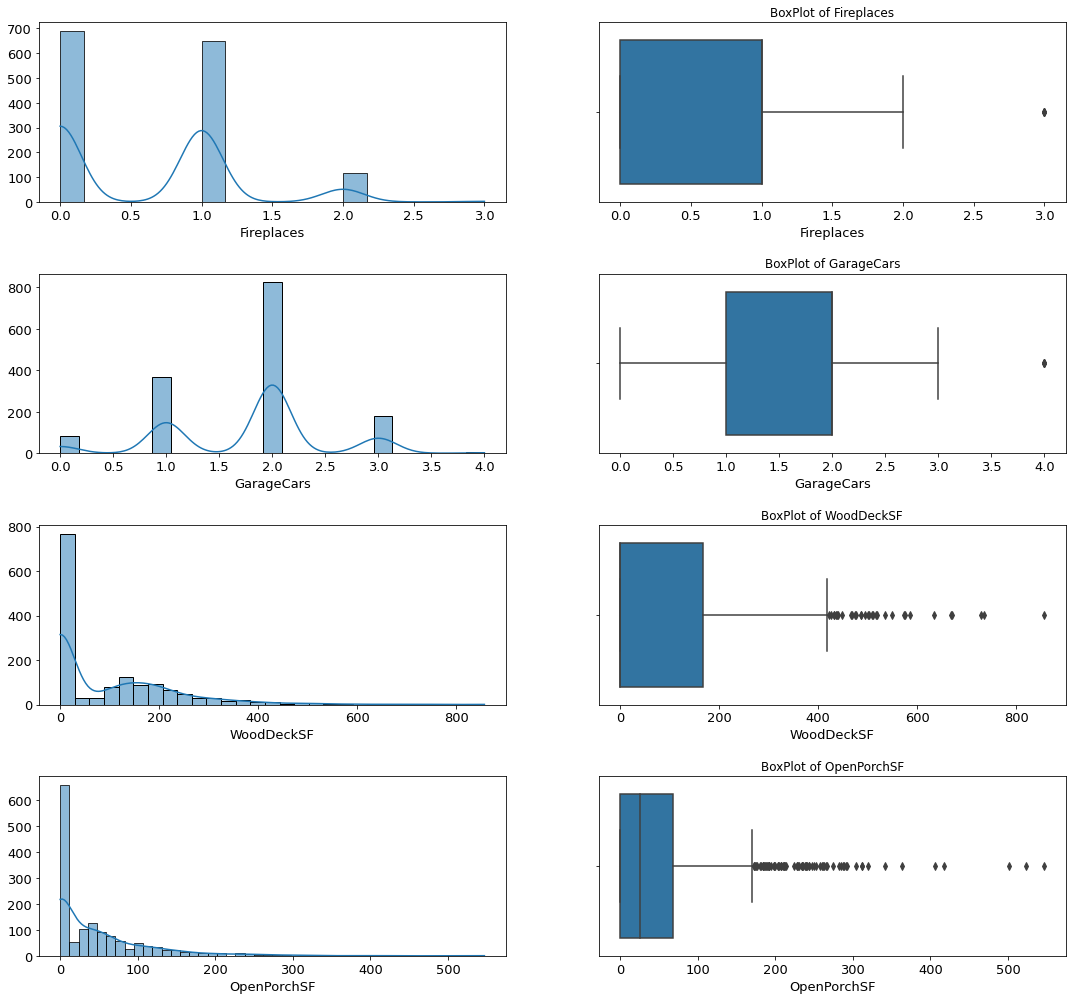

In [84]:
box_hist(columns_x = ['Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF'], 
         plot_indexes = [4,2], figsize = (15, 14))
plt.subplots_adjust(hspace = 0.4, wspace=0.2)

In [85]:
data["Fireplaces"].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

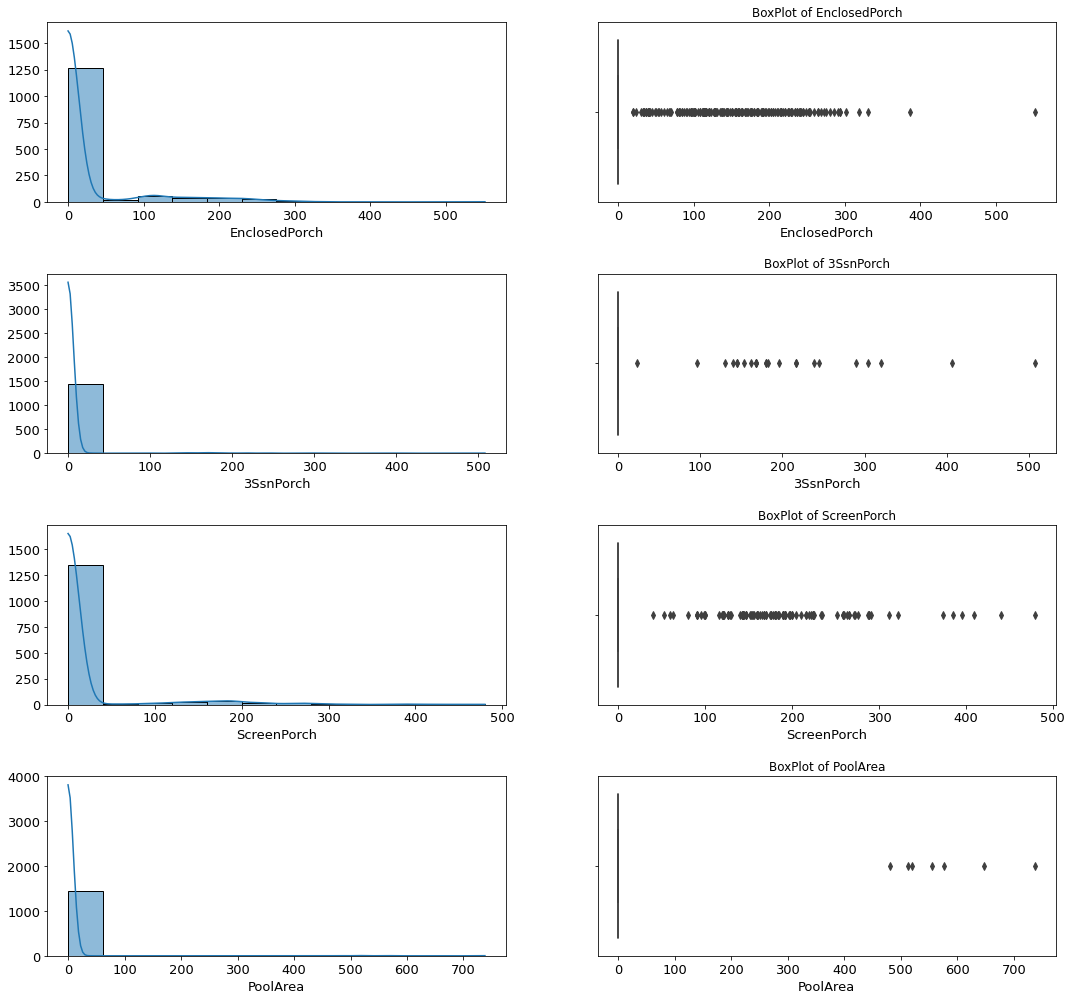

In [86]:
box_hist(columns_x = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], 
         plot_indexes = [4,2], figsize = (15, 14))
plt.subplots_adjust(hspace = 0.4, wspace=0.2)

In [87]:
data["3SsnPorch"].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

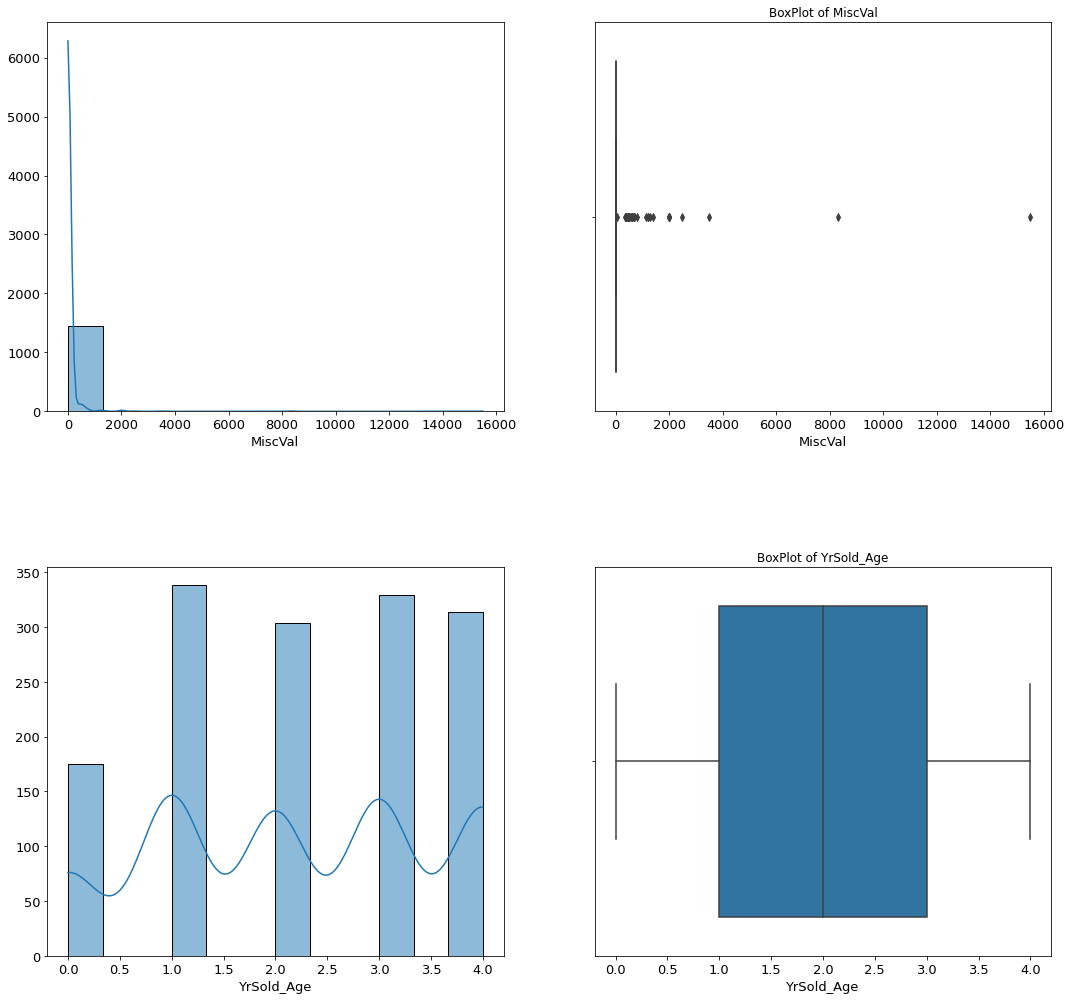

In [88]:
box_hist(columns_x = ['MiscVal','YrSold_Age'], 
         plot_indexes = [2,2], figsize = (15, 14))
plt.subplots_adjust(hspace = 0.4, wspace=0.2)

In [89]:
# Let's remove some annoying and unexplainable outliers; we found the same in the following columns
# ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "TotalBsmntSF", "GrLivArea", "WoodDeckSF"]

data = data[data["LotFrontage"] <= 300]


In [90]:
data = data[data["LotArea"] <= 100000]

In [91]:
data = data[data["MasVnrArea"] <= 1200]

In [92]:
data[data["BsmtFinSF1"] < 1700]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age
0,2-STORY_1946_AND_NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,Feb,208500,7,7,2
1,1-STORY_1946_AND_NEWER_ALL_STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,May,181500,34,34,3
2,2-STORY_1946_AND_NEWER,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,Sep,223500,9,8,2
3,2-STORY_1945_AND_OLDER,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,272,0,0,0,0,Feb,140000,95,40,4
4,2-STORY_1946_AND_NEWER,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,Dec,250000,10,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-STORY_1946_AND_NEWER,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,...,0,0,0,0,0,Aug,175000,11,10,3
1456,1-STORY_1946_AND_NEWER_ALL_STYLES,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,...,0,0,0,0,0,Feb,210000,32,22,0
1457,2-STORY_1945_AND_OLDER,RL,66.0,9042,Reg,Inside,Crawfor,2Story,7,9,...,0,0,0,0,2500,May,266500,69,4,0
1458,1-STORY_1946_AND_NEWER_ALL_STYLES,RL,68.0,9717,Reg,Inside,NAmes,1Story,5,6,...,112,0,0,0,0,Apr,142125,60,14,0


In [93]:
data[data["TotalBsmtSF"] < 1900]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age
0,2-STORY_1946_AND_NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,Feb,208500,7,7,2
1,1-STORY_1946_AND_NEWER_ALL_STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,May,181500,34,34,3
2,2-STORY_1946_AND_NEWER,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,Sep,223500,9,8,2
3,2-STORY_1945_AND_OLDER,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,272,0,0,0,0,Feb,140000,95,40,4
4,2-STORY_1946_AND_NEWER,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,Dec,250000,10,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-STORY_1946_AND_NEWER,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,...,0,0,0,0,0,Aug,175000,11,10,3
1456,1-STORY_1946_AND_NEWER_ALL_STYLES,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,...,0,0,0,0,0,Feb,210000,32,22,0
1457,2-STORY_1945_AND_OLDER,RL,66.0,9042,Reg,Inside,Crawfor,2Story,7,9,...,0,0,0,0,2500,May,266500,69,4,0
1458,1-STORY_1946_AND_NEWER_ALL_STYLES,RL,68.0,9717,Reg,Inside,NAmes,1Story,5,6,...,112,0,0,0,0,Apr,142125,60,14,0


In [94]:
data = data[data["GrLivArea"] < 4000]

In [95]:
data = data[data["WoodDeckSF"] < 800]

In [96]:
data = data[data["OpenPorchSF"] < 160]

In [97]:
for i in ['MiscVal', 'BsmtFinSF2', 'LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']:
    print(i)
    print(data[i].value_counts()[0]/data.shape[0] * 100)


MiscVal
96.61266568483063
BsmtFinSF2
88.80706921944035
LowQualFinSF
98.52724594992637
OpenPorchSF
48.08541973490427
EnclosedPorch
85.34609720176731
3SsnPorch
98.23269513991163
ScreenPorch
92.26804123711341
PoolArea
99.70544918998527


In [98]:
# From the analysis above we can drop the following columns as the tend to depict the behaviour of Discerte values
# The visualizations clearly shows the need to remove such columns; even if we convert into bins or categorical variables
# we wont be able to remove the skewness so its better to drop it

# ["MiscVal", "BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]

data.drop(["MiscVal", "BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"],
         axis = 1, inplace = True)

In [99]:
data.shape

(1358, 45)

## Observations from Univariate analysis with numerics

### Observations:
- There were annoying outliers in the numerical columns which were dealt with by removing them, we didnt remove all the outliers except the really extreme ones 
- We also found highly skewed data in numeerical columns just like we did in categorical columns, keeping our threshold the sanme our goal was to be consistent with the data so we sused 80% as our threshold; any value repersenting more than 80% the column are dropped

### Conclusion:
- Univariate analysis with numerical columns didnt reveal any majore trends other than help us detect some nasty outliers and skewness other than this we werent able to decipher any trends whatsover, mayble we can find some patterns in multivariate analysis since we took take care most of the outliers and skewness

In [100]:
data.shape


(1358, 45)

In [101]:
data.select_dtypes("object").columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'MoSold'],
      dtype='object')

In [102]:
print("*"*100, "\n")
percent_representation(columnames = data.select_dtypes("object").columns)
print("\n","*"*100)

**************************************************************************************************** 


FOR MSSubClass

Count of 1-STORY_1946_AND_NEWER_ALL_STYLES is 536 which represents about 36.712 of MSSubClass
Count of 2-STORY_1946_AND_NEWER is 299 which represents about 20.479 of MSSubClass
Count of 1-1/2_STORY_FINISHED_ALL_AGES is 144 which represents about 9.863 of MSSubClass
Count of 1-STORY_PUD_(Planned Unit Development)-1946_AND_NEWER is 87 which represents about 5.959 of MSSubClass
Count of 1-STORY_1945_AND_OLDER is 69 which represents about 4.726 of MSSubClass
Count of 2-STORY_PUD-1946_AND_NEWER is 63 which represents about 4.315 of MSSubClass
Count of 2-STORY_1945_AND_OLDER is 60 which represents about 4.11 of MSSubClass
Count of SPLIT_OR_MULTI-LEVEL is 58 which represents about 3.973 of MSSubClass
Count of DUPLEX-ALL_STYLES_AND_AGES is 52 which represents about 3.562 of MSSubClass
Count of 2_FAMILY_CONVERSION-ALL_STYLES_AND_AGES is 30 which represents about 2.055 of MSSub

## Observations:
- It is clear that there exists some skewness but the data is far more accurate now compared to the original data we were supplied with 
- All the unique features in each columns represent less than 80% of the entire data tops
- So now are analysis should be reliable enough to draw some conclusions

## Now Let's start with bi variate analysis

### NOTE:  Refer to the output above which is between " * "  for reference 

In [103]:
def subplot_bar(columns_x, y, plot_indexes, figsize = (17, 15), fontsize = 12, rotation = 0,
                dataframe = data):
    for name, index in zip(columns_x, range(1, len(columns_x) + 1)):
        plt.subplot(plot_indexes[0], plot_indexes[1], index)
        univariate_bivariate(x = name, y = y, barplot = True, 
                             figsize=figsize, rotation=rotation, 
                             fontsize=fontsize, estimator = np.median, order = ordering(x = name, y = y))
        
def subplot_box(columns_x, y, plot_indexes, figsize = (17, 22), fontsize = 12, rotation = 0,
                dataframe = data):
    for name, index in zip(columns_x, range(1, len(columns_x) + 1)):
        plt.subplot(plot_indexes[0], plot_indexes[1], index)
        univariate_bivariate(x = name, y = y, boxplot = True, 
                             figsize=figsize, rotation=rotation, 
                             fontsize=fontsize, estimator = np.median, order = ordering(x = name, y = y))

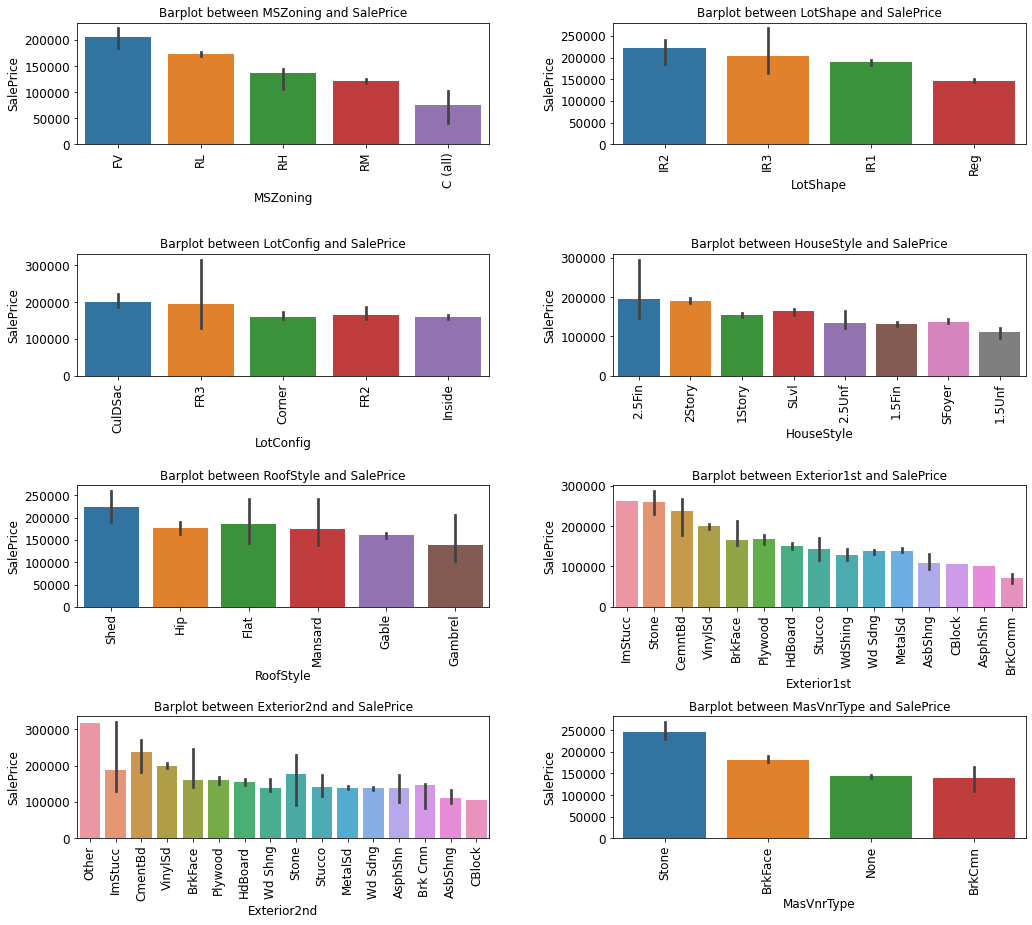

In [104]:
columns_x = ['MSZoning', 'LotShape', 'LotConfig', 'HouseStyle', 'RoofStyle', 
             'Exterior1st', 'Exterior2nd', 'MasVnrType']
y = "SalePrice"
subplot_bar(columns_x = columns_x, y = y, plot_indexes = [4, 2], rotation = 90)
plt.subplots_adjust(hspace = 0.9, wspace = 0.3)

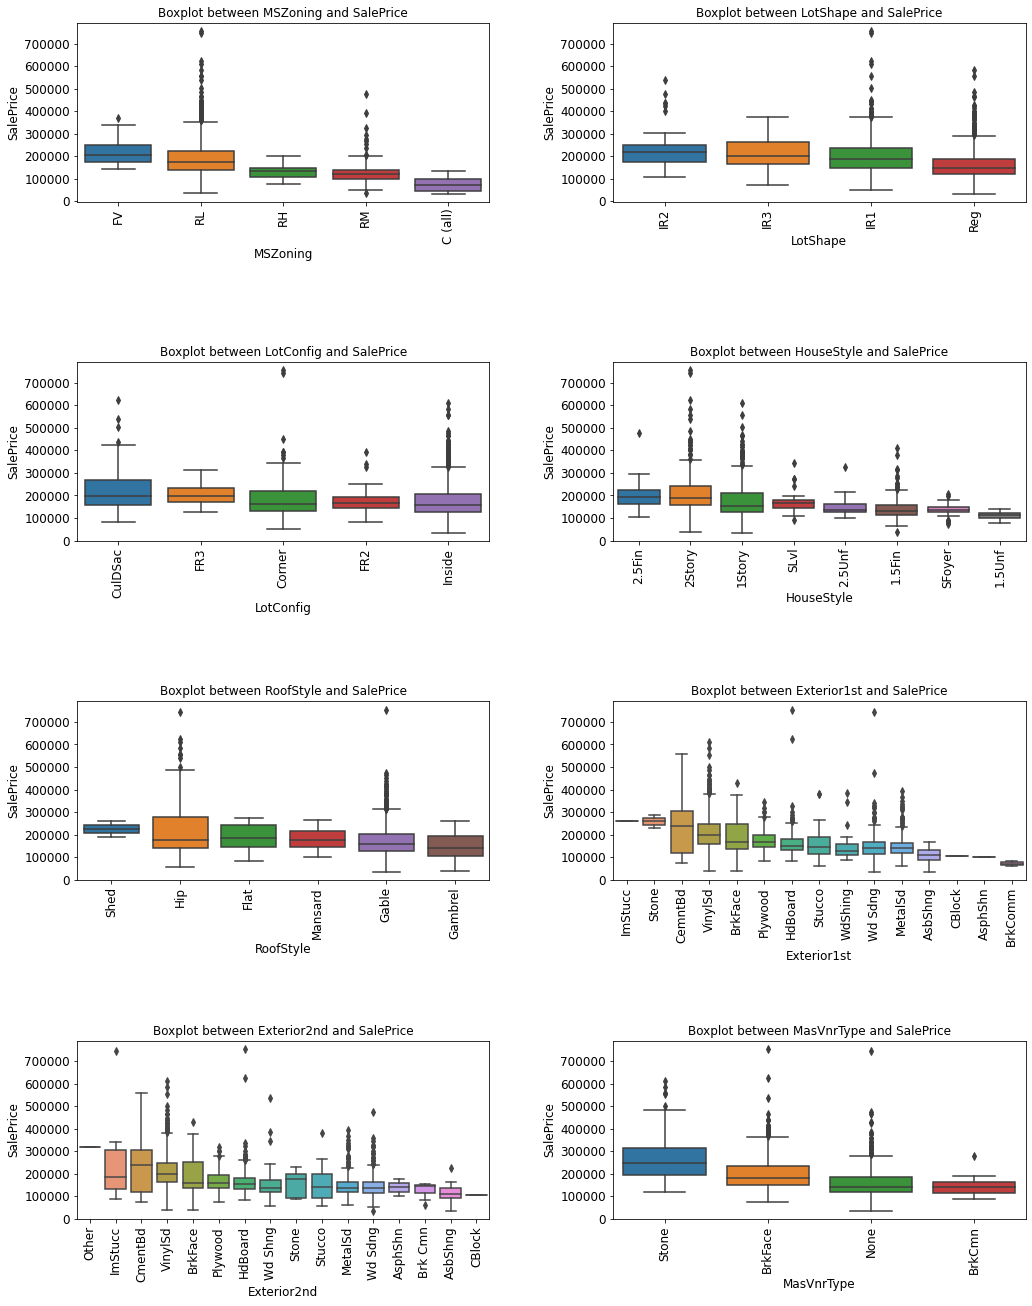

In [105]:
columns_x = ['MSZoning', 'LotShape', 'LotConfig', 'HouseStyle', 'RoofStyle', 
             'Exterior1st', 'Exterior2nd', 'MasVnrType']
y = "SalePrice"
subplot_box(columns_x = columns_x, y = y, plot_indexes = [4, 2], rotation = 90)
plt.subplots_adjust(hspace = 0.9, wspace = 0.3)

## Observations:
- FOR MSZoning: 
    - Floating village(FV) although maybe less popular high has the highest median SalePrice (150000 +) followed closely by Residential Low Density(RL) which seems to be more comoomn type of zone preferred by customers also it seems that floating villages require less maintenance comapred to that of tradityional houses , for more info kindly refer https://www.floatingville.com/floating-home/. We also see that maybe under right circumstances the prices of RL could touch as high as 700000, this may very well mean that not enough data is avalaible on FV, despite having considerbale amount of data of residential medium density (RM) Sales are good but not good enough compared to otehr features

- FOR LotShape
    - According to the visualizations the median rate for moderately irregular Lotshape is higher htan the rest but as we can see that the price of slightly irregular(IR1) and regular(reg) can go as high as as 700000 and 600000 respectively this could be the result that maybe we dont have enough data on IR2 or another reason could be that IR2 is not abundant enough in Australia
    
- FOR LotConfig
    - Well all the features have similar selling price which indicates that it enirely depends on the customer's liking coupled with other services and features.
    
- FOR HouseStyel
    - 2story seems have a higher selling price and overall the prices can go beyond 300000 under the right features
    - 2.5Fin is a close second although we dont have enough data on it, it shows s similar selling price point and it makes sense as it has one extra story
    - 1Story is a clear third and it seems to be more abundant and the most common choice
    
- FOR RoofStyle
    - Gable Roofstyle seems to be the most common chocie of customers mainly due to low installation cost and simple installation process, it also helps drain snow and water coupled with low cost, it is the go to choice for customers Although it may fetch more customers the selling price is low compared to other RoofStyle like Shed and Hip
    - Hip Roofstyle is just similar to that of Gable, but it is much more durable during snow and wind and we have enough data on to justify our claims
    - For Flat RoofStyle, it is more aesthetic and more functionality and features because of the added space on top but it comes with its own fair share of disadvanatges, especially during heavy rainfall and snow it becomes. a real hassle to clean the snow off of the roof making it not soo common chocie for the people plaqued by heavy snow and rainfall
    
- FOR Exterior1st
    - Imiation stucco (ImStucc) seems to have a higher seeling price but Vinyl slid is more abundant being the most common choice also the selling price of Vinyl Sliding is as high as 200000
    
- FOR MasVnrType
    - Data is  very vague in this having NONE, so it makes  the analysis a little bit difficult although Stone and BrkFc seems to have a higher selling price other than NONE

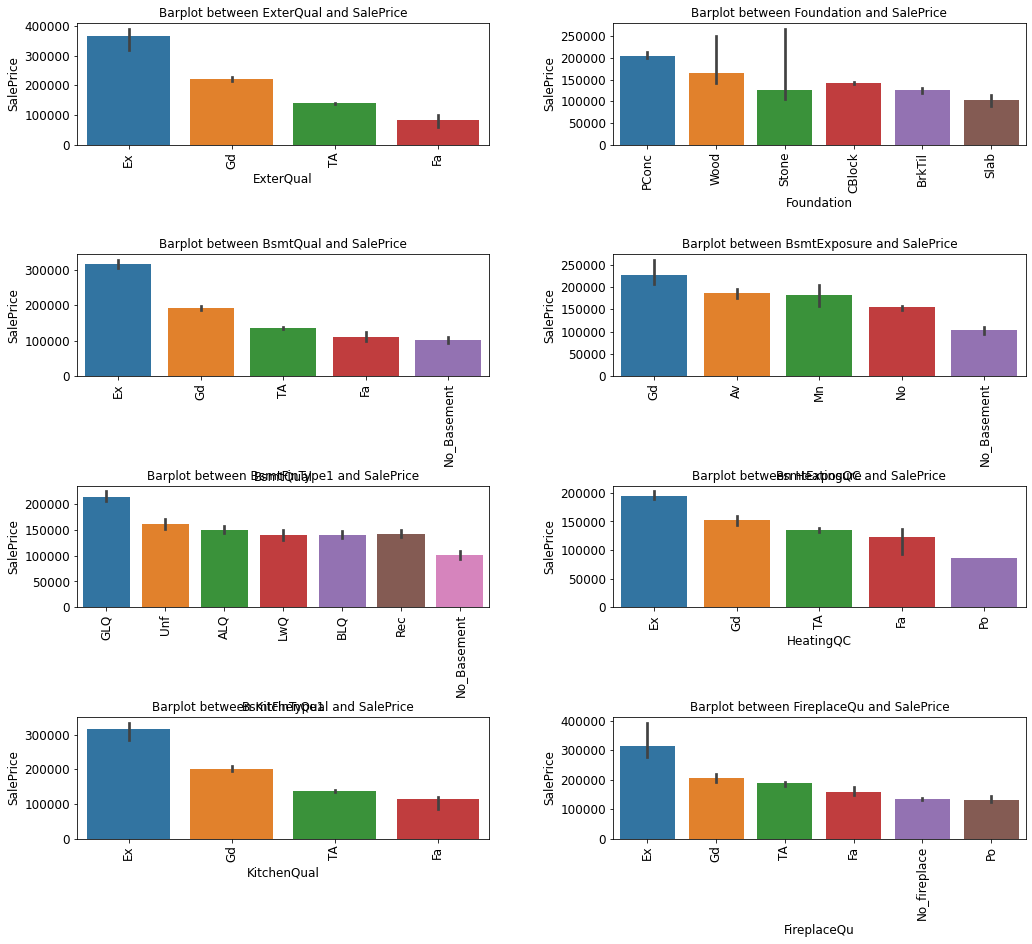

In [106]:
columns_x = ['ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
           'HeatingQC', 'KitchenQual', 'FireplaceQu']
y = "SalePrice"
subplot_bar(columns_x = columns_x, y = y, plot_indexes = [4, 2], rotation = 90)
plt.subplots_adjust(hspace = 0.9, wspace = 0.3)

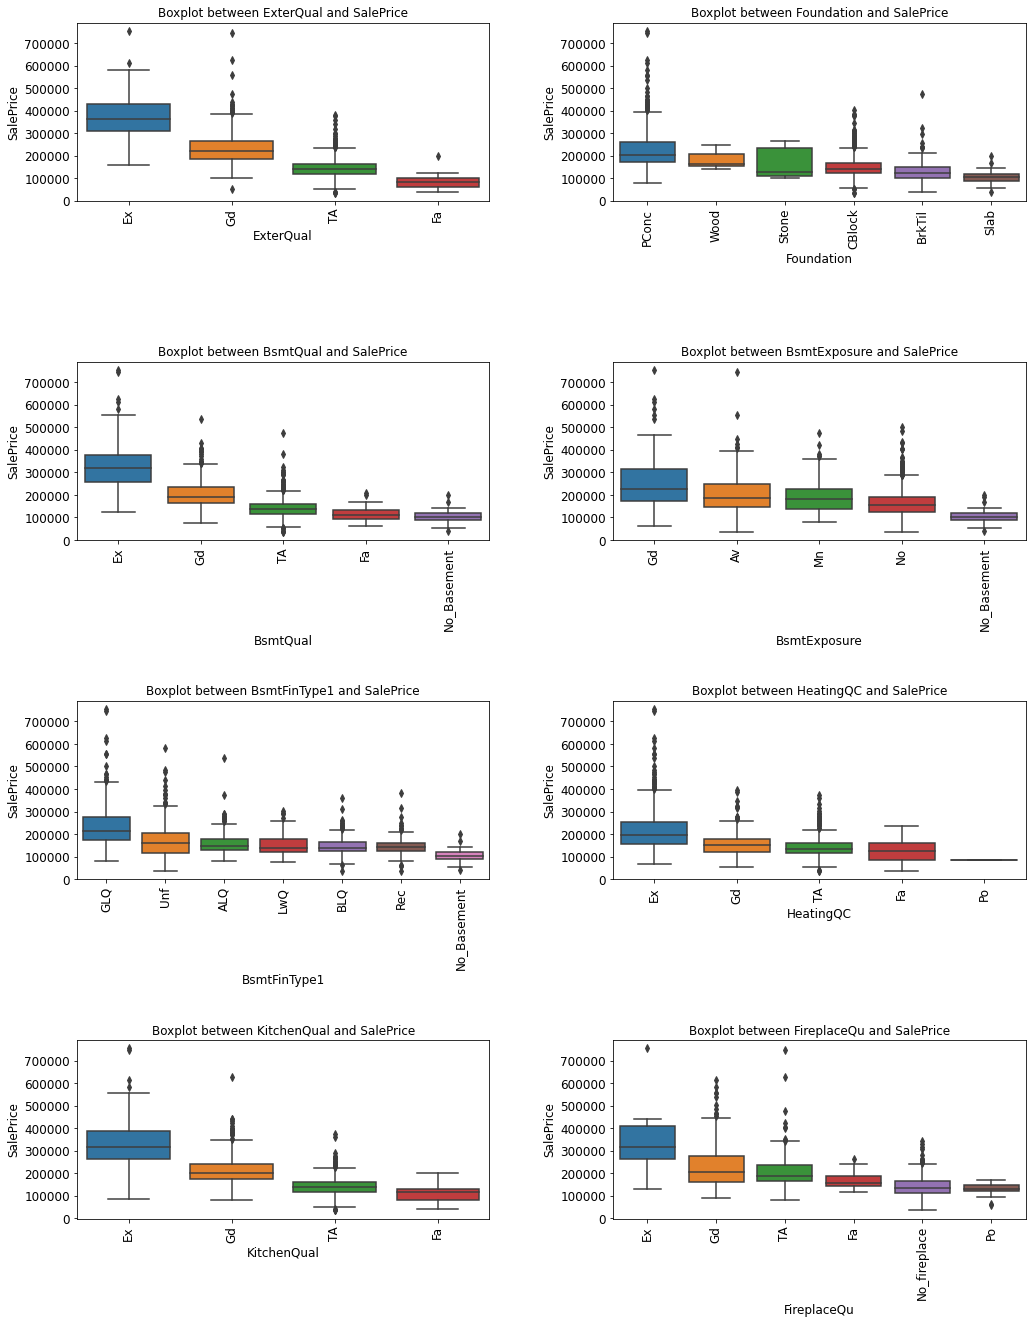

In [107]:
columns_x = ['ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
           'HeatingQC', 'KitchenQual', 'FireplaceQu']
y = "SalePrice"
subplot_box(columns_x = columns_x, y = y, plot_indexes = [4, 2], rotation = 90)
plt.subplots_adjust(hspace = 0.9, wspace = 0.3)

## Observations:
- The plots above talk about the quality of 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1','HeatingQC', 'KitchenQual', 'FireplaceQu'
- In all except for some shows that "Ex' have the highest selling price point compared to other grades, it makes sense that features having excellent quality will be sold at a higher price but it is difficult to maintain such standards for longer duration care must be taken that the quality shoudnt plumnge below TA (Typical/Average)

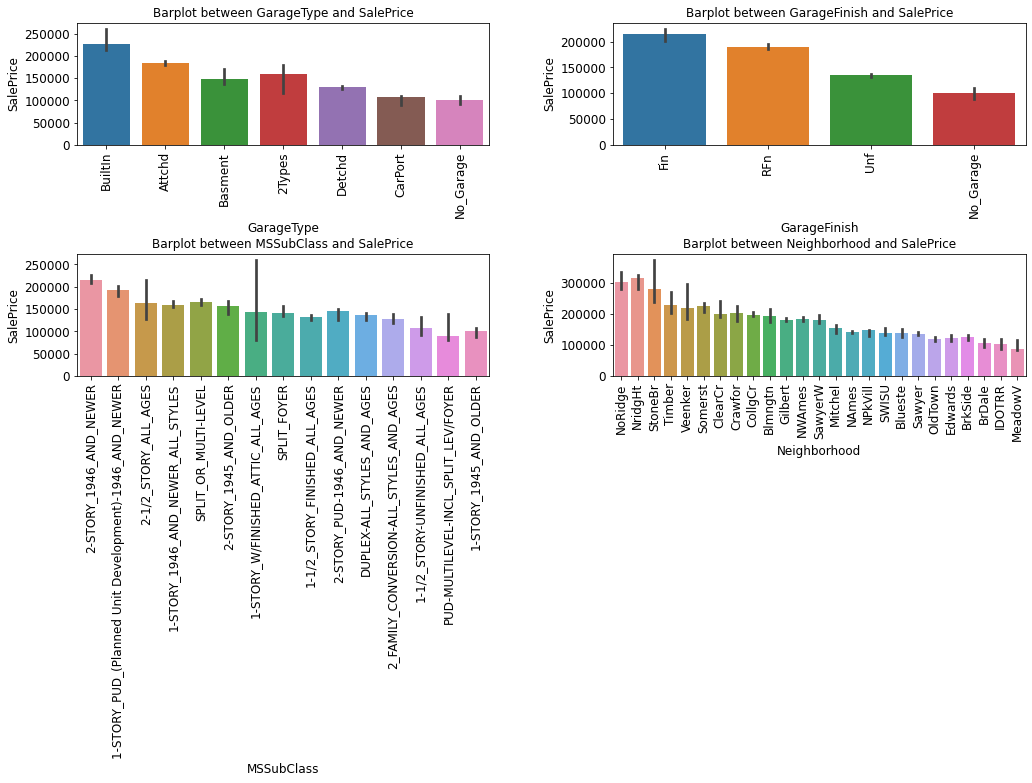

In [108]:
columns_x = ['GarageType', 'GarageFinish', 'MSSubClass', 'Neighborhood']
y = "SalePrice"
subplot_bar(columns_x = columns_x, y = y, plot_indexes = [4, 2], rotation = 90)
plt.subplots_adjust(hspace = 0.9, wspace = 0.3)

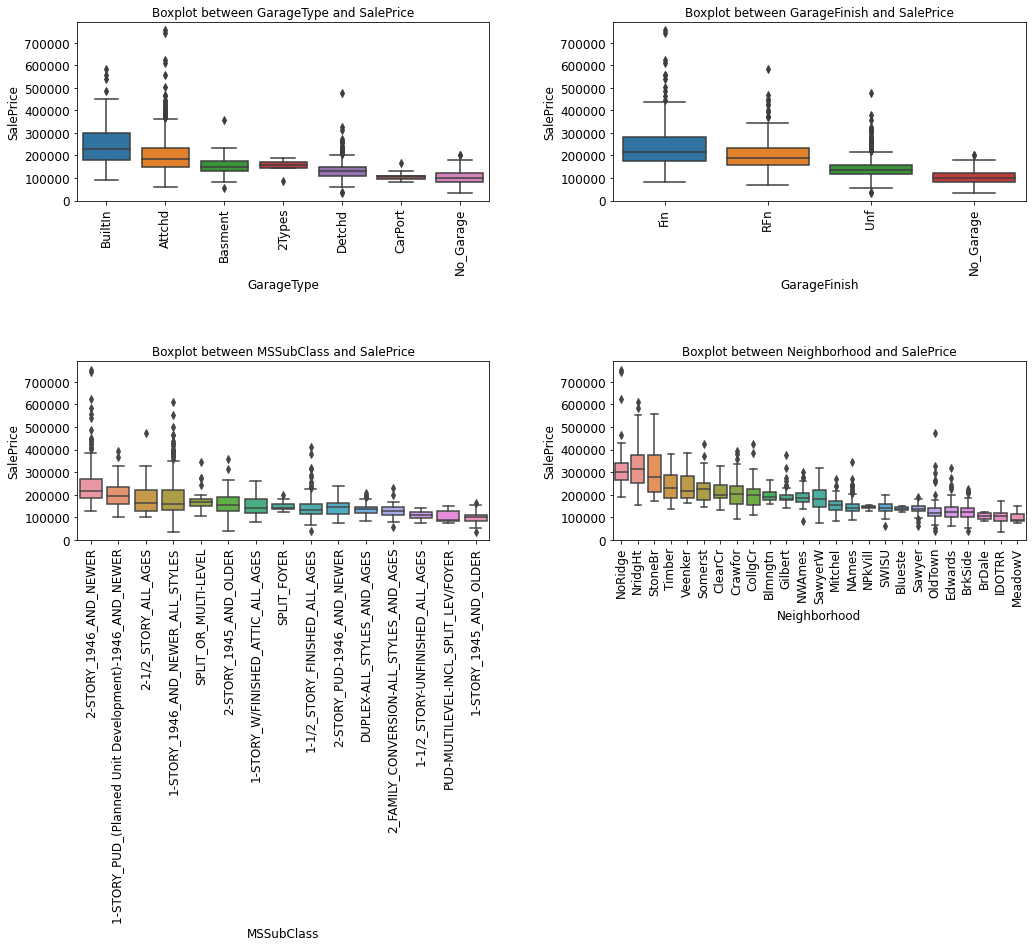

In [109]:
columns_x = ['GarageType', 'GarageFinish', 'MSSubClass', 'Neighborhood']
y = "SalePrice"
subplot_box(columns_x = columns_x, y = y, plot_indexes = [4, 2], rotation = 90)
plt.subplots_adjust(hspace = 0.9, wspace = 0.3)

## Observations:
- The plots above depicts the choices of the customers and honeslty we can only do soo much as interpreting a very limited data having being said that we see some order in GarageFinish, Fin(Finished) has a comparatively higher selling price followed by Rough Finished(RFn), UnFinished(Ufn) and No Garage
- For Garage type Built in Garage type has a higher selling price since it comes builtin with the hosue indicating a much higher GrLivArea in that case, it is closely followed by attached which is more common and go to choice for most customers.

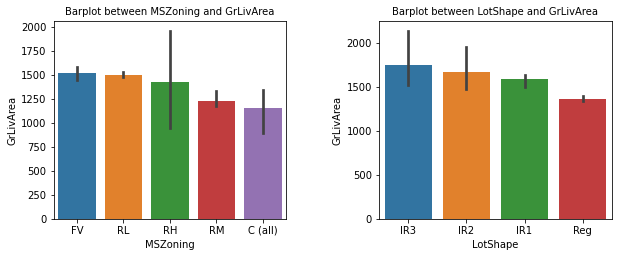

In [110]:
## Let's look at some of the other plots (Multi-variate analysis)
x = "MSZoning"
y = "GrLivArea"
plt.subplot(2,2,1)
univariate_bivariate(x = "MSZoning", y = "GrLivArea", barplot = True, order = ordering(x=x, y=y), estimator=np.median)

x = "LotShape"
plt.subplot(2,2,2)
univariate_bivariate(x = "LotShape", y = "GrLivArea", barplot = True, order = ordering(x=x, y=y), estimator=np.median)

plt.subplots_adjust(wspace = 0.4)

## Observations:
- Floating village has the highest median GrLivArea and GrLivArea is high correlated with SalePrice that is if GrLivArea increases the Sale Price will also most likely tend to incraese

In [111]:
data.shape

(1358, 45)

In [112]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'SalePrice', 'YearBuilt_Age',
       'YearRemodAdd_Age', 'YrSold_Age'],
      dtype='object')

In [113]:
data.select_dtypes("object").columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'MoSold'],
      dtype='object')

In [114]:
# Ordinal variables needs some mapping to be done

In [115]:
data["ExterQual"] = mapping(dataframe=data, column="ExterQual", mappings=[["Po", "Fa", "TA", "Gd", "Ex"], [1,2,3,4,5]])

In [116]:
data["GarageFinish"] = mapping(dataframe=data, column="GarageFinish", mappings=[["No_Garage", "Unf", "RFn",
                                                                                "Fin"], [0,1,2,3]])
data["GarageFinish"]

0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    1
1457    2
1458    1
1459    3
Name: GarageFinish, Length: 1358, dtype: int64

In [117]:
data["BsmtQual"] = mapping(dataframe = data, column = "BsmtQual", mappings=[["No_Basement", 
                                                                             "Po", "Fa", "TA", "Gd", "Ex"], 
                                                                            [0,1,2,3,4,5]])
data["BsmtExposure"] = mapping(dataframe = data, column = "BsmtExposure", mappings = [["No_Basement", "No", "Mn",
                                                                                      "Av", "Gd"], [0,1,2,3,4]])

data["HeatingQC"] = mapping(dataframe = data, column = "HeatingQC", mappings = [["Po", "Fa", "TA", "Gd", "Ex"], 
                                                                            [1,2,3,4,5]])
data["KitchenQual"] = mapping(dataframe = data, column = "KitchenQual", mappings = [["Po", "Fa", "TA", "Gd", "Ex"], 
                                                                            [1,2,3,4,5]])



In [118]:
#data[["ExterQual", "BsmtQual", "BsmtExposure", "HeatingQc", "KitchenQual", "FireplaceQu"]]

In [119]:
#data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})

In [120]:
data["FireplaceQu"].value_counts()

No_fireplace    657
Gd              352
TA              279
Fa               31
Ex               21
Po               18
Name: FireplaceQu, dtype: int64

In [121]:
data["FireplaceQu"] = mapping(dataframe = data, column = "FireplaceQu", mappings=[["No_fireplace", 
                                                                                  "Po", "Fa", "TA", "Gd", "Ex"],
                                                                                 [0,1,2,3,4,5]])

In [122]:
ordinal_object_type = ["BsmtQual", "ExterQual", "BsmtExposure", "HeatingQC", "KitchenQual", "FireplaceQu", "OverallQual",
                      "OverallCond", "GarageFinish"]

object_type = list(data.select_dtypes("object").columns)

int_type = list(data.select_dtypes(["int", "float"]).columns)





In [123]:
len(object_type)

14

In [124]:
int_type

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'YrSold_Age']

In [125]:
data.shape

(1358, 45)

In [126]:
int_type

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'YrSold_Age']

## Model Building

### Creating dummy variables for categorical columns

In [127]:
data.select_dtypes("object").columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtFinType1', 'GarageType', 'MoSold'],
      dtype='object')

In [128]:
object_type

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtFinType1',
 'GarageType',
 'MoSold']

In [129]:
data.select_dtypes(["int", "float"]).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'YearBuilt_Age',
       'YearRemodAdd_Age', 'YrSold_Age'],
      dtype='object')

In [130]:
new_data = pd.get_dummies(data = data, columns = object_type, drop_first = True)

In [131]:
new_data

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,...,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
0,65.0,8450,7,5,196.0,4,4,1,706,150,...,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,0.0,3,4,4,978,284,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,7,5,162.0,4,4,2,486,434,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,3,3,1,216,540,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,350.0,4,4,3,655,490,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,0.0,3,4,1,0,953,...,0,0,0,0,0,0,0,0,0,0
1456,85.0,13175,6,6,119.0,3,4,1,790,589,...,0,1,0,0,0,0,0,0,0,0
1457,66.0,9042,7,9,0.0,5,3,1,275,877,...,0,0,0,0,0,0,1,0,0,0
1458,68.0,9717,5,6,0.0,3,3,2,49,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
new_data.select_dtypes("object")

""
0
1
2
3
4
...
1455
1456
1457
1458


### Splitting the data into train and test set

In [133]:
df_train, df_test = train_test_split(new_data, train_size=0.7, test_size=0.3, random_state=100)

In [134]:
df_train

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,...,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
31,60.0,8544,5,6,0.0,3,3,1,0,1228,...,0,0,0,0,1,0,0,0,0,0
350,68.0,7820,9,5,362.0,5,5,1,0,1869,...,1,0,0,0,0,0,0,0,0,0
872,74.0,8892,5,7,0.0,4,3,3,0,105,...,0,0,0,0,0,0,0,0,1,0
952,60.0,7200,5,8,0.0,3,4,3,660,108,...,0,0,0,0,0,0,0,0,0,0
1272,60.0,13526,5,6,114.0,3,3,1,560,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,70.0,7931,5,5,0.0,3,3,1,1148,0,...,0,0,0,1,0,0,0,0,0,0
57,89.0,11645,7,5,0.0,4,4,1,0,860,...,0,0,0,0,0,0,0,0,0,0
375,60.0,10020,1,1,0.0,2,2,4,350,333,...,0,0,0,0,0,1,0,0,0,0
84,60.0,8530,7,5,22.0,3,4,1,0,384,...,0,0,0,0,0,0,1,0,0,0


In [135]:
df_test

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,...,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
1436,60.0,9000,4,6,0.0,3,3,1,616,248,...,0,0,0,0,0,0,1,0,0,0
388,93.0,9382,7,5,125.0,4,4,1,0,1468,...,0,0,0,1,0,0,0,0,0,0
1407,60.0,8780,5,5,0.0,3,3,1,625,208,...,0,0,0,0,0,1,0,0,0,0
954,35.0,9400,6,5,250.0,3,4,4,945,0,...,0,0,0,0,0,0,0,0,1,0
788,50.0,6000,4,7,0.0,3,3,1,0,901,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,50.0,2500,7,8,0.0,4,3,1,299,611,...,0,0,0,0,1,0,0,0,0,0
173,80.0,10197,6,5,491.0,3,3,1,288,700,...,0,0,0,0,1,0,0,0,0,0
1321,60.0,6627,3,6,0.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
761,60.0,6911,5,5,0.0,3,3,2,405,740,...,0,0,0,0,0,0,0,0,1,0


### Scaling the values using Standard Scaler

In [136]:
std_scaler = StandardScaler()

In [137]:
list(data.select_dtypes("object").columns)

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtFinType1',
 'GarageType',
 'MoSold']

In [138]:
df_train[int_type] = std_scaler.fit_transform(df_train[int_type])
df_train[int_type]

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,...,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age
31,-0.391450,-0.248313,-0.774572,0.373212,-0.599401,-0.674946,-0.513357,-0.572014,-1.012558,1.467895,...,-0.932386,-0.980877,-0.808902,-1.031729,-0.760044,0.680757,-0.375704,0.164223,-1.035569,-0.135595
350,0.014807,-0.390743,2.105442,-0.519864,1.607129,2.819325,1.728892,-0.572014,-1.012558,2.900961,...,0.638122,1.220736,0.322846,0.316473,0.959766,0.425952,1.865726,-1.191536,-1.083384,0.609001
872,0.319500,-0.179851,-0.774572,1.266288,-0.599401,1.072189,-0.513357,1.351574,-1.012558,-1.042765,...,-0.932386,-0.980877,-0.808902,0.316473,0.845112,-0.824911,-0.818780,0.594097,-0.557420,-0.135595
952,-0.391450,-0.512715,-0.774572,2.159364,-0.599401,-0.674946,0.607767,1.351574,0.536126,-1.036058,...,-0.932386,-0.980877,1.454593,-1.031729,0.812354,-0.824911,-0.580967,-0.034181,-0.892124,-0.880190
1272,-0.391450,0.731785,-0.774572,0.373212,0.095473,-0.674946,-0.513357,-0.572014,0.301477,-1.277510,...,-0.932386,-0.980877,-0.808902,-1.031729,0.714079,-0.824911,-0.539782,0.197290,0.924840,1.353596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,0.116371,-0.368907,-0.774572,-0.519864,-0.599401,-0.674946,-0.513357,-0.572014,1.681214,-1.277510,...,-0.932386,-0.980877,-0.808902,-1.031729,-0.760044,-0.824911,-0.599567,0.395694,1.211729,-0.880190
57,1.081233,0.361740,0.665435,-0.519864,-0.599401,1.072189,0.607767,-0.572014,-1.012558,0.645168,...,-0.932386,-0.980877,0.322846,0.316473,-0.760044,0.796578,0.250713,-1.092335,-0.939939,1.353596
375,-0.391450,0.042058,-3.654587,-4.092169,-0.599401,-2.422082,-1.634481,2.313368,-0.191286,-0.533031,...,-0.932386,-0.980877,-1.940649,-2.379930,-0.760044,-0.824911,-1.549489,1.619184,1.642063,-0.880190
84,-0.391450,-0.251067,0.665435,-0.519864,-0.465303,-0.674946,0.607767,-0.572014,-1.012558,-0.419012,...,0.638122,0.670333,1.454593,0.316473,0.222705,0.842906,-0.121284,-0.794729,-0.557420,-0.880190


In [139]:
df_test[int_type] = std_scaler.transform(df_test[int_type])

In [140]:
## Splitting into X_train, y_train, X_test, y_test

y_train = df_train.pop("SalePrice")
X_train = df_train

y_test = df_test.pop("SalePrice")
X_test = df_test

## Training the data

In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [142]:
y_train_pred = lr.predict(X_train)


In [143]:
print(r2_score(y_true = y_train, y_pred=y_train_pred))


0.9291488773292051


## Validating Linear Assumptions

### Assumption 1:  Linear relationship between a predictor variable and reponse variable
- We already saw the same in the pairplot above and it validates our assumptions that there indeed exists a linear realtionship

### Assumtpion 2: Normality of the error terms

<Figure size 720x648 with 0 Axes>

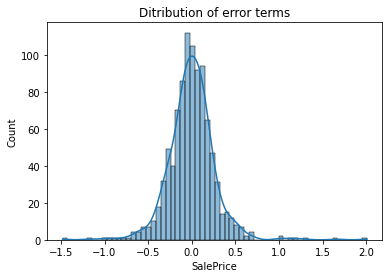

<Figure size 720x648 with 0 Axes>

In [144]:
error = y_train - y_train_pred
sns.histplot(x = error, kde = True)
plt.title("Ditribution of error terms" )
plt.figure(figsize=(10,9))

## Observations:
- The error terms are indeed normally distributed around 0
- Second assumption is validated

## Assumtpion 3: Homoscadacity

<AxesSubplot:ylabel='SalePrice'>

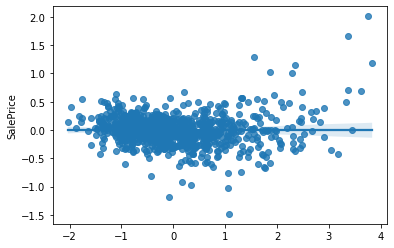

In [145]:
sns.regplot(y = error, x = y_train_pred)

## Observations:
- There is an obvious pattern more in the plot and the points are not randomly distributed 
- Our Assumtpion 3 is not validated

In [146]:
# Let's see the test accuracy regardless
y_test_pred = lr.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

-3.9950919651168035e+19


## Observations:
- Our r2 score is pathetic and this model cannot be our final model
- Let's use regularization to improve our model and fix it

## Ridge regression
### We will GridSearchCV to find the best alpha for ridge regression

In [147]:
params = {"alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 30, 50 ,70, 100, 250, 500]}

ridge = Ridge()

model_cv1 = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       verbose = 1,
                       scoring = "neg_mean_absolute_error",
                       return_train_score=True,
                       cv = 5)

model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20,
                                   30, 50, 70, 100, 250, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
model_cv1.best_params_

{'alpha': 10}

In [149]:
def create_df(X_columns, coefficients):
    trial_features = pd.DataFrame()
    trial_features["Columns"] = X_columns
    trial_features["Coefficients"] = coefficients
    return trial_features[trial_features["Coefficients"]!=0].shape

In [150]:
ridge_main = Ridge(alpha=10)
ridge_main.fit(X_train, y_train)
y_train_pred1 = ridge_main.predict(X_train)
y_test_pred1 = ridge_main.predict(X_test)
print(r2_score(y_true = y_train, y_pred=y_train_pred1))
print(r2_score(y_true = y_test, y_pred = y_test_pred1))

0.9203042193617692
0.8908734516247909


In [151]:
#create_df(X_columns = X_train.columns, coefficients=ridge_main.coef_)

## Lasso Regression

In [152]:
params = {"alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 30, 50 ,70, 100, 250, 500]}

lasso = Lasso()

model_cv2 = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       verbose = 1,
                       scoring = "neg_mean_absolute_error",
                       return_train_score=True,
                       cv = 5)

model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20,
                                   30, 50, 70, 100, 250, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [153]:
model_cv2.best_params_

{'alpha': 0.001}

In [154]:
#final model

lasso1 = Lasso(alpha=0.001)
lasso1.fit(X_train, y_train)

y_train_pred2 = lasso1.predict(X_train)
y_test_pred2 = lasso1.predict(X_test)

print(r2_score(y_true = y_train, y_pred=y_train_pred2))
print(r2_score(y_true = y_test, y_pred = y_test_pred2))

0.9210514421564119
0.8913219189131056


In [155]:
#create_df(X_columns=X_train.columns, coefficients=lasso1.coef_)

## Let's once again validate our assumptions

### Asumption 1 : Linearity among the predictor and response variables
- We have already proved this in our pairplot

### Assumption 2 : Normality of error terms

<Figure size 864x720 with 0 Axes>

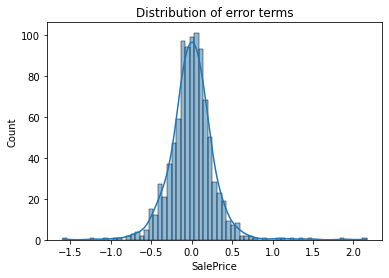

<Figure size 864x720 with 0 Axes>

In [156]:
y_pred_train3 = lasso1.predict(X_train)
error_new = y_train - y_pred_train3
sns.histplot(error_new, kde = True)
plt.title("Distribution of error terms")
plt.figure(figsize = (12,10))

## Observations:
- Error terms are normally distributed around - so this checks our second assumtpions

### Assumtpion 3 : Homoscaedacity

<AxesSubplot:ylabel='SalePrice'>

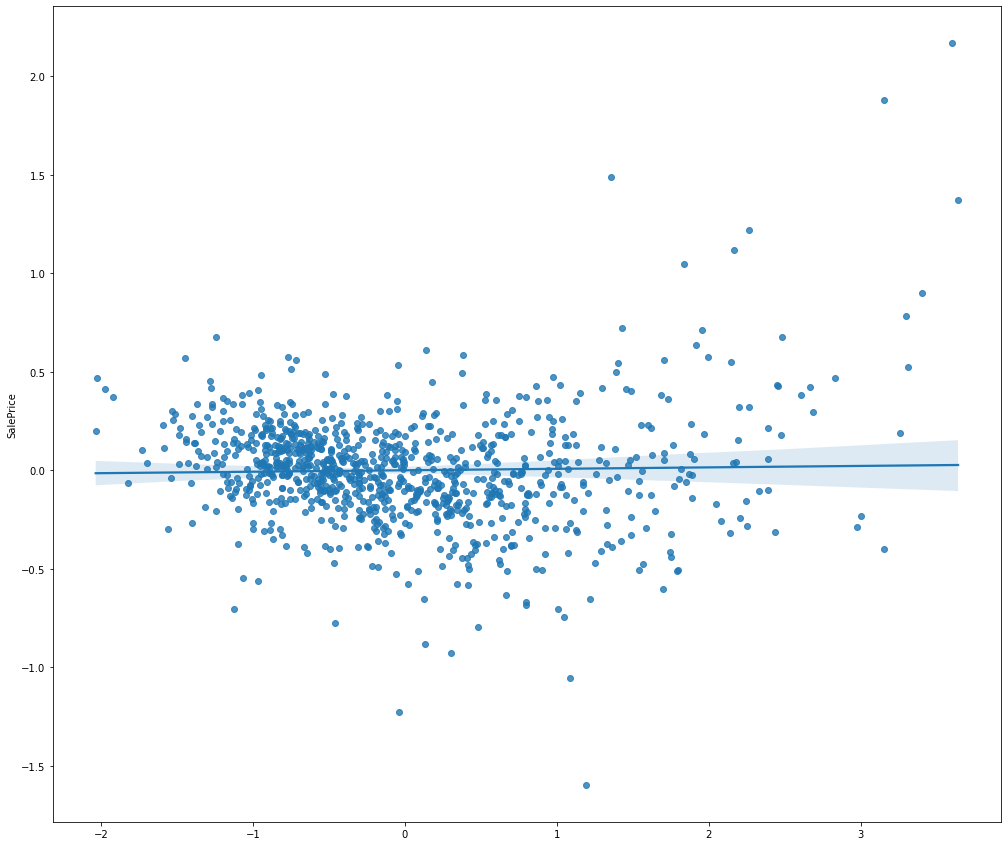

In [157]:
plt.figure(figsize = (17,15))

sns.regplot(x = y_pred_train3, y = error_new)


### Regplot between actual and predicted values


Text(0.5, 1.0, 'Actual vs predicted')

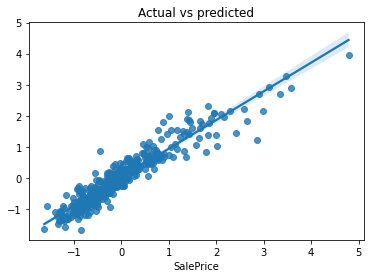

In [158]:

sns.regplot(x = y_test, y = y_test_pred2)

plt.title("Actual vs predicted")

## ASSIGNMENT QUESTIONS

In [159]:
important_features = pd.DataFrame()
important_features["Columns"] = X_train.columns
important_features["Coefficient_ridge_10"] = ridge_main.coef_
important_features["Coefficient_lasso_0.001"] = lasso1.coef_
#important_features.sort_values(by = "Coefficient", ascending=False)

In [160]:
#Doubling the Alpha for Ridge
ridge_trial = Ridge(alpha=20)
ridge_trial.fit(X_train, y_train)

y_train_pred4 = ridge_trial.predict(X_train)
y_test_pred4 = ridge_trial.predict(X_test)

print(r2_score(y_true = y_train, y_pred=y_train_pred4))
print(r2_score(y_true = y_test, y_pred = y_test_pred4))

0.9160294513895281
0.8892823172568826


In [161]:
# Doubling the Alpha for Lasso
lasso_trial = Lasso(alpha=0.002)
lasso_trial.fit(X_train, y_train)

y_train_pred5 = lasso_trial.predict(X_train)
y_test_pred5 = lasso_trial.predict(X_test)

print(r2_score(y_true = y_train, y_pred=y_train_pred5))
print(r2_score(y_true = y_test, y_pred = y_test_pred5))

0.9156987462441777
0.8889654445353388


In [162]:
important_features["Coefficient_ridge_20"] = ridge_trial.coef_
important_features["Coefficient_lasso_0.002"] = lasso_trial.coef_


In [163]:
important_features

,Columns,Coefficient_ridge_10,Coefficient_lasso_0.001,Coefficient_ridge_20,Coefficient_lasso_0.002
0,LotFrontage,0.024589,0.014664,0.030598,0.017861
1,LotArea,0.073950,0.071511,0.075455,0.073685
2,OverallQual,0.155653,0.150150,0.161652,0.161324
3,OverallCond,0.086934,0.092209,0.084172,0.089531
4,MasVnrArea,0.090678,0.081898,0.096662,0.089762
...,...,...,...,...,...
146,MoSold_Mar,0.028704,0.028346,0.024399,0.005820
147,MoSold_May,0.038717,0.045254,0.034713,0.035793
148,MoSold_Nov,-0.025379,-0.000000,-0.020603,-0.000000
149,MoSold_Oct,-0.018509,-0.000000,-0.014375,-0.000000


In [164]:
important_features.sort_values(by = "Coefficient_lasso_0.002", ascending = False)[["Columns", "Coefficient_lasso_0.002"]]

,Columns,Coefficient_lasso_0.002
76,Neighborhood_StoneBr,0.475480
131,BsmtFinType1_No_Basement,0.374890
70,Neighborhood_NridgHt,0.345252
13,GrLivArea,0.302099
10,TotalBsmtSF,0.181817
...,...,...
120,MasVnrType_BrkFace,-0.089886
27,YearBuilt_Age,-0.110187
68,Neighborhood_NWAmes,-0.116441
33,MSSubClass_1-STORY_PUD_(Planned Unit Developme...,-0.187302


In [165]:
important_features[important_features["Coefficient_lasso_0.002"]!=0].shape

(71, 5)

In [166]:
important_features.sort_values(by = "Coefficient_lasso_0.001", ascending = False)[["Columns", "Coefficient_lasso_0.001"]]

,Columns,Coefficient_lasso_0.001
76,Neighborhood_StoneBr,0.542072
131,BsmtFinType1_No_Basement,0.523844
70,Neighborhood_NridgHt,0.378321
13,GrLivArea,0.279181
10,TotalBsmtSF,0.208006
...,...,...
65,Neighborhood_Mitchel,-0.104954
27,YearBuilt_Age,-0.117669
68,Neighborhood_NWAmes,-0.159654
33,MSSubClass_1-STORY_PUD_(Planned Unit Developme...,-0.233318


In [167]:
# Dropping the  5 most importasnt predicter variable and rebuilding the model

In [168]:
X_train_new = X_train.drop(["Neighborhood_StoneBr", "BsmtFinType1_No_Basement", "Neighborhood_NridgHt", 
                            "GrLivArea", "MSSubClass_2-STORY_PUD-1946_AND_NEWER"], axis = 1)

X_test_new = X_test.drop(["Neighborhood_StoneBr", "BsmtFinType1_No_Basement", "Neighborhood_NridgHt", 
                            "GrLivArea", "MSSubClass_2-STORY_PUD-1946_AND_NEWER"], axis = 1)

In [169]:
X_train_new

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,...,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
31,-0.391450,-0.248313,-0.774572,0.373212,-0.599401,-0.674946,-0.513357,-0.572014,-1.012558,1.467895,...,0,0,0,0,1,0,0,0,0,0
350,0.014807,-0.390743,2.105442,-0.519864,1.607129,2.819325,1.728892,-0.572014,-1.012558,2.900961,...,1,0,0,0,0,0,0,0,0,0
872,0.319500,-0.179851,-0.774572,1.266288,-0.599401,1.072189,-0.513357,1.351574,-1.012558,-1.042765,...,0,0,0,0,0,0,0,0,1,0
952,-0.391450,-0.512715,-0.774572,2.159364,-0.599401,-0.674946,0.607767,1.351574,0.536126,-1.036058,...,0,0,0,0,0,0,0,0,0,0
1272,-0.391450,0.731785,-0.774572,0.373212,0.095473,-0.674946,-0.513357,-0.572014,0.301477,-1.277510,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,0.116371,-0.368907,-0.774572,-0.519864,-0.599401,-0.674946,-0.513357,-0.572014,1.681214,-1.277510,...,0,0,0,1,0,0,0,0,0,0
57,1.081233,0.361740,0.665435,-0.519864,-0.599401,1.072189,0.607767,-0.572014,-1.012558,0.645168,...,0,0,0,0,0,0,0,0,0,0
375,-0.391450,0.042058,-3.654587,-4.092169,-0.599401,-2.422082,-1.634481,2.313368,-0.191286,-0.533031,...,0,0,0,0,0,1,0,0,0,0
84,-0.391450,-0.251067,0.665435,-0.519864,-0.465303,-0.674946,0.607767,-0.572014,-1.012558,-0.419012,...,0,0,0,0,0,0,1,0,0,0


In [170]:
X_test_new

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,...,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
1436,-0.391450,-0.158605,-1.494576,0.373212,-0.599401,-0.674946,-0.513357,-0.572014,0.432881,-0.723063,...,0,0,0,0,0,0,1,0,0,0
388,1.284361,-0.083455,0.665435,-0.519864,0.162522,1.072189,0.607767,-0.572014,-1.012558,2.004457,...,0,0,0,1,0,0,0,0,0,0
1407,-0.391450,-0.201885,-0.774572,-0.519864,-0.599401,-0.674946,-0.513357,-0.572014,0.453999,-0.812490,...,0,0,0,0,0,1,0,0,0,0
954,-1.661005,-0.079914,-0.054569,-0.519864,0.924446,-0.674946,0.607767,2.313368,1.204876,-1.277510,...,0,0,0,0,0,0,0,0,1,0
788,-0.899272,-0.748788,-1.494576,1.266288,-0.599401,-0.674946,-0.513357,-0.572014,-1.012558,0.736830,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,-0.899272,-1.437335,0.665435,2.159364,-0.599401,1.072189,-0.513357,-0.572014,-0.310957,0.088486,...,0,0,0,0,1,0,0,0,0,0
173,0.624193,0.076879,-0.054569,-0.519864,2.393434,-0.674946,-0.513357,-0.572014,-0.336768,0.287460,...,0,0,0,0,1,0,0,0,0,0
1321,-0.391450,-0.625440,-2.214580,0.373212,-0.599401,-0.674946,-3.876730,-1.533809,-1.012558,-1.277510,...,0,0,0,1,0,0,0,0,0,0
761,-0.391450,-0.569569,-0.774572,-0.519864,-0.599401,-0.674946,-0.513357,0.389780,-0.062229,0.376887,...,0,0,0,0,0,0,0,0,1,0


In [171]:
params = {"alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 30, 50 ,70, 100, 250, 500]}

lasso_new = Lasso()

model_cv3 = GridSearchCV(estimator = lasso_new,
                       param_grid = params,
                       verbose = 1,
                       scoring = "neg_mean_absolute_error",
                       return_train_score=True,
                       cv = 5)

model_cv3.fit(X_train_new, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20,
                                   30, 50, 70, 100, 250, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [172]:
model_cv3.best_params_

{'alpha': 0.001}

In [173]:
lasso_diff = Lasso(alpha=0.001)
lasso_diff.fit(X_train_new, y_train)

y_train_pred6 = lasso_diff.predict(X_train_new)
y_test_pred6 = lasso_diff.predict(X_test_new)

print(r2_score(y_true = y_train, y_pred=y_train_pred6))
print(r2_score(y_true = y_test, y_pred = y_test_pred6))

0.9061908551883096
0.8758167939140951


In [174]:
new_features = pd.DataFrame()
new_features["Columns"] = X_train_new.columns
new_features["lasso_Coefficients"] = lasso_diff.coef_

In [175]:
new_features.sort_values(by = "lasso_Coefficients", ascending = False)

,Columns,lasso_Coefficients
121,Foundation_Slab,0.496390
10,TotalBsmtSF,0.292006
12,2ndFlrSF,0.207857
2,OverallQual,0.194456
134,GarageType_No_Garage,0.185285
...,...,...
72,Neighborhood_Somerst,-0.181897
63,Neighborhood_Mitchel,-0.240633
66,Neighborhood_NWAmes,-0.243529
57,Neighborhood_CollgCr,-0.279136


## CONCLUSION AND OBSERVATIONS
- GrLivArea highly influences the SalePrice higher the Area higher the SalePrice
- Quality of any variable indicating the quality should be excellent that will fetch the highest Sale Price but since that will be too expensive to maintain so the quality shouldnt dip below TA (Typical/Average)
- Neighborhood is also something that should be looked at although some extra data would be really useful about the neighnorhood for example crime rate, accidents etc
- Customers also tend to go for Garages which are attached to the house
- Materials used in the exterior of the hosue also plays a huge role in dertming the price of the property
- RoofStyles like Gable and Hit are often preferred although it boils down to thier personal opinion